## 1. 선형회귀 & 오차역전파 실습

### 1) 넘파이로 짜는 선형회귀 & 오차역전파

In [ ]:
import numpy as np

# 공부시간(h)을 x로 넣고 시험점수(y)를 예측
X = np.array([1, 2, 3, 4, 5])
y = np.array([60, 70, 80, 90, 100])

# 평균 계산을 위한 데이터 갯수를 미리 구함
m = len(X)

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    # 선형 모델
    y_pred = w * X + b

    # Mean Squared Error
    cost = (1/m) * sum((y - y_pred)**2)

    # 기울기 계산
    dw = -(2/m) * sum(X * (y - y_pred))  # 가중치에 대한 편미분
    db = -(2/m) * sum(y - y_pred)        # 절편에 대한 편미분

    # 경사하강법 수행
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 print
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

# 학습이 끝난 후 최종 가중치와 절편 출력
print(f'\n최종 가중치와 절편 값은: w = {w:.4f}, b = {b:.4f}')

# 모델 예측
y_pred = w * X + b
print(f'예측 값: {y_pred}')


Epoch 1: Cost = 6600.0000, w = 5.2000, b = 1.6000
Epoch 11: Cost = 355.5166, w = 20.5692, b = 7.4245
Epoch 21: Cost = 305.9810, w = 21.2394, b = 9.1253
Epoch 31: Cost = 285.8235, w = 20.9338, b = 10.5055
Epoch 41: Cost = 267.1042, w = 20.5743, b = 11.8219
Epoch 51: Cost = 249.6113, w = 20.2225, b = 13.0933
Epoch 61: Cost = 233.2640, w = 19.8821, b = 14.3223
Epoch 71: Cost = 217.9874, w = 19.5531, b = 15.5104
Epoch 81: Cost = 203.7112, w = 19.2350, b = 16.6589
Epoch 91: Cost = 190.3700, w = 18.9274, b = 17.7691

최종 가중치와 절편 값은: w = 18.6594, b = 18.7367
예측 값: [ 37.39614963  56.05557597  74.71500231  93.37442865 112.03385499]


### 문제: 아래 칸을 채워넣어 학습 코드를 완성하시오.

In [ ]:
import numpy as np

# 공부시간(h)을 x로 넣고 시험점수(y)를 예측
X = np.array([1, 2, 3, 4, 5])
y = np.array([60, 70, 80, 90, 100])

# 평균 계산을 위한 데이터 갯수를 미리 구함
m = len(X)

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    # 선형 모델
    y_pred =

    # Mean Squared Error
    cost =

    # 기울기 계산
    dw =
    db =

    # 경사하강법 수행
    w = w -
    b = b -

    # 매 10회마다 print
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

# 학습이 끝난 후 최종 가중치와 절편 출력
print(f'\n최종 가중치와 절편 값은: w = {w:.4f}, b = {b:.4f}')

# 모델 예측
y_pred = w * X + b
print(f'와인퀄리티 예측: {y_pred}')

### 2) 캘리포니아 주택 가격 데이터셋을 이용한 선형회귀

### 사이킷런에서 제공해주는 캘리포니아 주택 가격 데이터셋 컬럼 리스트

#### 1. X값 (feature)

- MedInc (Median Income): 중간 소득 (단위: 10,000 달러)

- HouseAge (Housing Median Age): 주택 중간 연령

- AveRooms (Average Rooms per Household): 가구당 평균 방 개수.

- AveBedrms (Average Bedrooms per Household): 가구당 평균 침실 개수.

- Population: 해당 지역의 인구 수

- AveOccup (Average Occupancy per Household): 가구당 평균 거주자 수.

- Latitude: 해당 지역의 위도

- Longitude: 해당 지역의 경도

#### 2. y값 (target)

- MedHouseVal (Median House Value): 주택 중간 가격 (단위: 10,000 달러)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing  # 캘리포니아 주택 데이터셋
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 캘리포니아 주택 가격 데이터
california = fetch_california_housing()

In [ ]:
X = california.data[:, 0]  # 중간소득만 X값으로 사용
y = california.target  # 주택 가격 y값

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
X_valid = scaler.transform(X_valid.reshape(-1, 1)).flatten()

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

# 평균을 위한 갯수 측정
m = len(X_train)

# 경사 하강법을 통한 학습
for epoch in range(epochs):
    # 선형 모델
    y_pred = w * X_train + b

    # Mean Squared Error
    cost = (1/m) * sum((y_train - y_pred)**2)

    # 기울기 계산
    dw = -(2/m) * sum(X_train * (y_train - y_pred))  # w에 대한 편미분
    db = -(2/m) * sum(y_train - y_pred)             # b에 대한 편미분

    # 파라미터 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 비용 출력
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

# 학습된 모델을 테스트 데이터에 적용하여 예측
y_pred_valid = w * X_valid + b

# 테스트 결과 출력
print("\n평가 데이터 셋 예측:")
print(y_pred_valid)

# 실제값과 비교
print("\n정답 값:")
print(y_valid)

# MSE 계산
mse_valid = (1/len(y_valid)) * sum((y_valid - y_pred_valid)**2)
print(f"\n평가 데이터 셋 Mean Squared Error: {mse_valid:.4f}")

# R2 Score 계산
r2 = r2_score(y_valid, y_pred_valid)
print(f"평가 데이터 셋 R2 Score: {r2:.4f}")

# RMSE 계산
rmse_valid = np.sqrt(mse_valid)
print(f"평가 데이터 셋 Root Mean Squared Error: {rmse_valid:.4f}")

# MAE 계산
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
print(f"평가 데이터 셋 Mean Absolute Error: {mae_valid:.4f}")


Epoch 1: Cost = 5.6297, w = 0.0160, b = 0.0414
Epoch 11: Cost = 3.9909, w = 0.1591, b = 0.4129
Epoch 21: Cost = 2.8967, w = 0.2761, b = 0.7164
Epoch 31: Cost = 2.1663, w = 0.3717, b = 0.9643
Epoch 41: Cost = 1.6786, w = 0.4497, b = 1.1669
Epoch 51: Cost = 1.3530, w = 0.5135, b = 1.3325
Epoch 61: Cost = 1.1357, w = 0.5657, b = 1.4678
Epoch 71: Cost = 0.9906, w = 0.6083, b = 1.5783
Epoch 81: Cost = 0.8937, w = 0.6431, b = 1.6686
Epoch 91: Cost = 0.8290, w = 0.6715, b = 1.7424

평가 데이터 셋 예측:
[0.99713116 1.30633464 1.65143788 ... 3.74275332 1.39861193 1.67762615]

정답 값:
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]

평가 데이터 셋 Mean Squared Error: 0.7935
평가 데이터 셋 R2 Score: 0.3944
평가 데이터 셋 Root Mean Squared Error: 0.8908
평가 데이터 셋 Mean Absolute Error: 0.6244


### 문제: 와인 CSV파일이 주어졌을때 아래 칸을 채워넣어 학습 코드를 완성하시오.

#### 와인 데이터셋 feature 설명

- fixed acidity: 고정 산도
- volatile acidity: 휘발성 산도
- citric acid: 구연산
- residual sugar: 잔류 당분
- chlorides: 염화물
- free sulfur dioxide: 유리 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소 이온 농도 (산성도)
- sulphates: 황산염
- alcohol: 알코올 도수
- quality: 품질 (와인의 품질 등급)
- class: 클래스 (와인의 종류 또는 품종)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 와인 데이터 로드
data = pd.read_csv('wine.csv')

X = data['residual sugar'].values  # 잔류 당분을 X로
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# 데이터를 훈련 세트와 valid 세트로 나누기



# 데이터 정규화


# 파라미터 초기화



# 학습률, 반복 횟수



# 평균을 위한 갯수 측정


# 경사 하강법을 통한 학습

    # 선형 모델


    # Mean Squared Error


    # 기울기 계산
                                                    # w에 대한 편미분
                                                     # b에 대한 편미분

    # 파라미터 업데이트



    # 매 10회마다 비용 출력



# 학습된 모델을 테스트 데이터에 적용하여 예측


# 테스트 결과 출력



# 실제값과 비교



# MSE 계산




Epoch 1: Cost = 111.3250, w = -0.0087, b = 0.2097
Epoch 11: Cost = 74.7301, w = -0.0868, b = 2.0891
Epoch 21: Cost = 50.2991, w = -0.1506, b = 3.6246
Epoch 31: Cost = 33.9887, w = -0.2027, b = 4.8793
Epoch 41: Cost = 23.0998, w = -0.2453, b = 5.9045
Epoch 51: Cost = 15.8303, w = -0.2801, b = 6.7421
Epoch 61: Cost = 10.9771, w = -0.3085, b = 7.4266
Epoch 71: Cost = 7.7370, w = -0.3317, b = 7.9858
Epoch 81: Cost = 5.5739, w = -0.3507, b = 8.4427
Epoch 91: Cost = 4.1299, w = -0.3662, b = 8.8160

평가 데이터 예측 :
[8.51607171 9.35095606 8.94139015 ... 9.38246113 8.760236   8.30341248]

실제 값:
[12.2  9.9 12.  ... 12.4  9.4  8.7]

평가 데이터 셋의 Mean Squared Error: 3.2925


### 1. 파이토치 모듈 이해

In [ ]:
import torch  # 딥러닝 프레임워크 파이토치 불러오기
import torch.autograd # 자동 미분(back prop)을 위함 함수들 포함
import torch.nn # 간단한 선형 방정식 정의, 다양한 레이어, 활성화 함수,
import torch.optim # 최적화 알고리즘들이 담겨있는 모듈

# ※ 텐서조작을 왜 공부해야 할 까?

→ 텐서의 구조가 익숙해야 이미지와 시계열에 대해서 잘 조작할 수 있다.

이미지는 (묶음사이즈, 크기, 세로)

시계열은 (묶음사이즈, 시간길이, 크기, 세로)



## 2. 텐서 조작 (참고:위키독스)

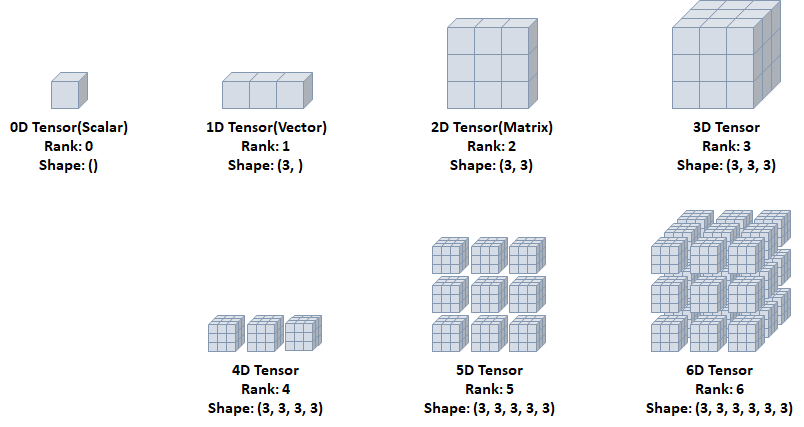

파이토치에서는 텐서 타입만 가능 -> 텐서 shape 알아야 함
* 3D: (z, x, y)

### 2. 텐서 조작 - 1) 넘파이로 텐서 만들기

In [ ]:
import numpy as np

# 1) 1D Numpy 행렬
# list -> tensor
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print('Shape of t: ', t.shape)

Shape of t:  (7,)


In [ ]:
# 2) 2D Numpy 행렬

t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print('Shape of t: ', t.shape)

Shape of t:  (4, 3)


### 2. 텐서 조작 - 2) 파이토치로 텐서 만들기

In [ ]:
import torch

# 1) 1D PyTorch 텐서
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # size

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])


In [ ]:
# 2) 2D PyTorch 텐서
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)
print(t.dim())  # rank. 즉, 차원
print(t.shape) # shape
print(t.size()) # size

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])
torch.Size([4, 3])


### 2. 텐서 조작 - 3) 브로드캐스팅(Broadcasting)

In [ ]:
# 텐서 + 텐서
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
# 벡터 텐서 + scalar 텐서
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [ ]:
m1 = torch.FloatTensor([[1, 2]]) # 2 x 1 벡터 텐서
m2 = torch.FloatTensor([[3], [4]]) # 1 x 2 벡터 텐서
print(m1 + m2) # 각각 더해져서 나온다.

tensor([[4., 5.],
        [5., 6.]])


■ 중간문제: 텐서 덧셈 훈련 (15분)


In [ ]:
# 1. [[1,2]] + [3] = [[4,5]]

# 2. [[1,2],[4,5]] + [7] = [[8,9], [11,12]]

# 3. [[1,2],[4,5]] + [1,2] =[[2,4], [5,7]]

# 4. [[1,2,3],[4,5,6]] + [7] =[[8, 9, 10], [11, 12, 13]]

# 5. [[1,2],[3,4]] + [5] =[[5,7], [8,9]]

# 6. [[6]] + [[2,4],[5,6]] = [[8,10], [11, 12]]

# 7. [[3,4]] + [[1,2],[3,4]] = [[4,6], [6,8]]

# 8. [[2,4]] + [5] =[[7,9]]

# 9. [[1,2],[3,4]] + [6] = [[7,8], [9,10]]

# 10. [[5,7],[9,11]] + [2,3] =[[7,10], [11,14]]

# 11. [[1,1,1],[2,2,2]] + [3] = [[4, 4, 4], [5,5,5]]

# 12. [[3,5],[7,9]] + [[1,2],[3,4]] =[[4,7], [10,13]]

# 13. [[4]] + [[1,3],[5,7]] =[[5,7], [9,11]]

# 14. [[6,8]] + [4] =[[10,12]]

# 15. [[3,3],[3,3]] + [7] = [[10, 10], [10,10]]

# 16. [[2,4,6]] + [[1,1,1],[2,2,2]] = [[3,5,7], [4,6,8]]

# 17. [[9,8],[7,6]] + [1] = [[10,9], [8, 7]]

# 18. [[1]] + [[5,5],[5,5]] =[[6,6], [6,6]]

# 19. [[4,4]] + [[2,2],[2,2]] =[[6,6], [6,6]]

# 20. [[1,2,3],[4,5,6],[8,9,9]] + [3] =[[4,5,6], [7,8,9], [11, 12, 12]]

### 2. 텐서 조작 - 4) 곱셈

### 행렬곱 (Matrix Multiplication) - 행렬 곱셈으로 수행

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]]) # 2 x 2 행렬 원소 곱셈 원리 (m x n) x (n x p)
m2 = torch.FloatTensor([[1], [2]]) # 2 x 1
print(m1.matmul(m2)) # 2 x 1 matrix multiplication

tensor([[ 5.],
        [11.]])


### 곱셈 (Multiplication) - 원소끼리 곱해짐

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]]) # 2 x 2
m2 = torch.FloatTensor([[1], [2]]) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2 동일한 연산.

tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


### 2. 텐서 조작 - 5) 평균

In [ ]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())

tensor(2.5000)


In [ ]:
print(t.mean(dim=0)) # 세로방향
print(t.mean(dim=1)) # 가로방향

tensor([2., 3.])
tensor([1.5000, 3.5000])


### 2. 텐서 조작 - 6) 덧셈

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 세로방향

print(t.sum(dim=1)) # 가로방향, 마지막 차원
print(t.sum(dim=-1)) # 마지막 차원       (2, 2) => 0,1 dim 방향 -> 마지막 차원인 1방향으로 덧셈을 해라.

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


### 3차원은 좀 dim 인덱스 순서가 다르다!

2D: 0 세로, 1 가로

3D: 0 z 방향, 1 세로, 2 가로

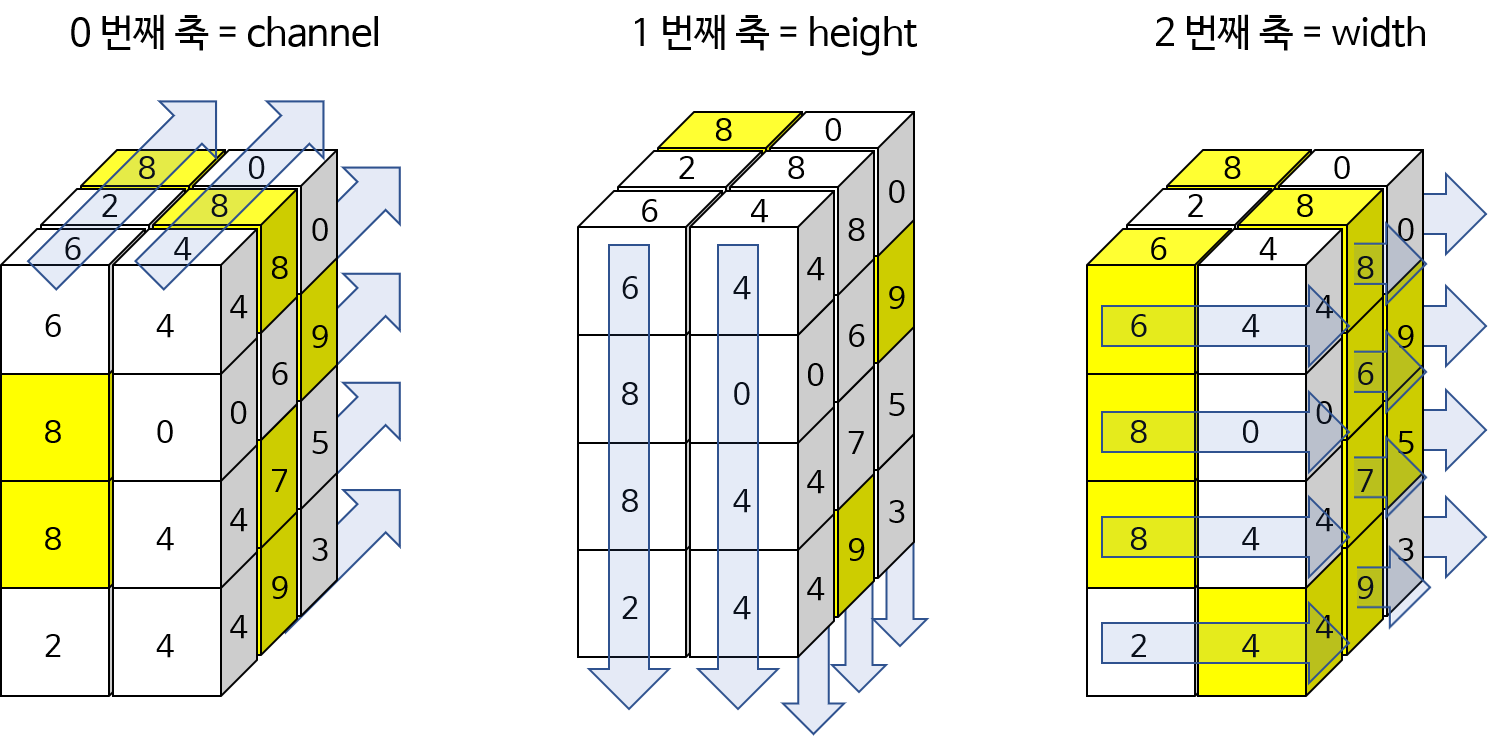

In [ ]:
tensor = torch.tensor([
    [[6, 4, 0],
     [8, 4, 9],
     [8, 0, 5]],

    [[6, 4, 0],
     [8, 4, 9],
     [8, 0, 5]],

    [[2, 4, 4],
     [6, 4, 4],
     [4, 3, 9]]
])

print("========================================")
# z방향
sum_dim0 = torch.sum(tensor, dim=0)
mean_dim0 = torch.mean(tensor.float(), dim=0)

print("Sum along dim=0:\n", sum_dim0)
print("Mean along dim=0:\n", mean_dim0)

print("========================================")
# 아래방향
sum_dim1 = torch.sum(tensor, dim=1)
mean_dim1 = torch.mean(tensor.float(), dim=1)

print("Sum along dim=1:\n", sum_dim1)
print("Mean along dim=1:\n", mean_dim1)

print("========================================")
# 옆방향
sum_dim2 = torch.sum(tensor, dim=2)
mean_dim2 = torch.mean(tensor.float(), dim=2)

print("Sum along dim=2:\n", sum_dim2)
print("Mean along dim=2:\n", mean_dim2)

Sum along dim=0:
 tensor([[14, 12,  4],
        [22, 12, 22],
        [20,  3, 19]])
Mean along dim=0:
 tensor([[4.6667, 4.0000, 1.3333],
        [7.3333, 4.0000, 7.3333],
        [6.6667, 1.0000, 6.3333]])
Sum along dim=1:
 tensor([[22,  8, 14],
        [22,  8, 14],
        [12, 11, 17]])
Mean along dim=1:
 tensor([[7.3333, 2.6667, 4.6667],
        [7.3333, 2.6667, 4.6667],
        [4.0000, 3.6667, 5.6667]])
Sum along dim=2:
 tensor([[10, 21, 13],
        [10, 21, 13],
        [10, 14, 16]])
Mean along dim=2:
 tensor([[3.3333, 7.0000, 4.3333],
        [3.3333, 7.0000, 4.3333],
        [3.3333, 4.6667, 5.3333]])


■ 중간문제: 곱셈,평균, 덧셈 훈련

In [ ]:
# 작성 예시:
# 1. m1 = torch.tensor([[1, 2], [3, 4]])
#    m2 = torch.tensor([[5, 6], [7, 8]])
#    result = m1.matmul(m2)
#    답: tensor([[19, 22], [43, 50]])

# 2. m1 = torch.tensor([[2, 0], [1, 3]])
#    m2 = torch.tensor([[3, 4], [2, 1]])
#    result = m1.matmul(m2)
#    답:tensor([[6, 8], [9, 7]])

# 3. m1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
#    m2 = torch.tensor([[7, 8], [9, 10], [11, 12]])
#    result = m1.matmul(m2)
#    답:tensor([[58, 64]. [139, 154]])

# 4. t = torch.tensor([[1, 2], [3, 4]])
#    result = t.mean()
#    답:tensor(2.500)

# 5. t = torch.tensor([[3, 6], [9, 12]])
#    result = t.mean(dim=1)
#    답:tensor([4.5, 10.5])

# 6. t = torch.tensor([[1, 1, 1], [2, 2, 2]])
#    result = t.mean(dim=0)
#    답:tensor([1.5, 1.5, 1.5])

# 7. t = torch.tensor([[1, 2], [3, 4]])
#    result = t.sum(dim=0)
#    답:tensor([4, 6])

# 8. t = torch.tensor([[2, 4], [6, 8]])
#    result = t.sum(dim=1)
#    답:tensor([6, 14])

# 9. t = torch.tensor([[1, 3], [5, 7]])
#    result = t.sum()
#    답:tensor(16)

# 10. m1 = torch.tensor([[2, 4, 6]])
#     m2 = torch.tensor([[1], [3], [5]])
#     result = m1.matmul(m2)
#     답:tensor(44)

# 11. m1 = torch.tensor([[5, 6], [7, 8]])
#     m2 = torch.tensor([[9, 10], [11, 12]])
#     result = m1.matmul(m2)
#     답:tensor([[111, 122], [151, 166]])

# 12. t = torch.tensor([[2, 4], [6, 8]])
#     result = t.mean(dim=1)
#     답:tensor([3.0, 7.0])

# 13. t = torch.tensor([[3, 3], [6, 6]])
#     result = t.mean(dim=0)
#     답:tensor([4.5, 4.5])

# 14. t = torch.tensor([[1, 1], [2, 2]])
#     result = t.sum(dim=1)
#     답:tensor([2, 4])

# 15. t = torch.tensor([[2, 2], [3, 3]])
#     result = t.sum()
#     답:tensor(10)

# 16. m1 = torch.tensor([[1, 0, 2], [-1, 3, 1]])
#     m2 = torch.tensor([[2, 3], [4, 5], [6, 7]])
#     result = m1.matmul(m2)
#     답:tensor([[14, 17], [16, 19]])

# 17. t = torch.tensor([[5, 10], [15, 20]])
#     result = t.mean(dim=1)
#     답:tensor([7.5, 17.5])

# 18. t = torch.tensor([[2, 5, 8], [3, 6, 9]])
#     result = t.mean(dim=0)
#     답:tensor([2.5, 5.5, 8.5])

# 19. t = torch.tensor([[1, 2], [3, 4]])
#     result = t.sum(dim=1)
#     답:tensor([3, 7])

# 20. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#     result = t.sum(dim=0)
#     답:tensor([8,12,16])


### 2. 텐서 조작 - 7) Max와 ArgMax => 중요!! classification에 사용

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.max(dim=0))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [ ]:
print(t.max(dim=0)[0])

tensor([3., 4.])


In [ ]:
print(t.max(dim=0)[1]) #argmax와 같음

tensor([1, 1])


In [ ]:
print("argmax:", t.argmax(0) ) # 0 방향으로 최대값의 위치

argmax: tensor([1, 1])


■ 중간문제: max, argmax 훈련

In [ ]:
# 1. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#    result = torch.max(t)
#    답: tensor(11)

# 2. t = torch.tensor([[4, 7, 2], [5, 8, 1]])
#    result = torch.max(t, dim=0)
#    답: values = tensor([5, 8, 2])
#        indices = tensor([1, 1, 0])

# 3. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#    result = torch.argmax(t, dim=1)
#    답: tensor([2, 2])

# 4. t = torch.tensor([[10, 20, 30], [40, 50, 60], [15, 25, 35]])
#    result = torch.max(t, dim=1)
#    답:values = tensor([30, 60, 35])
#       indices = tensor([2, 2, 2])

# 5. t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#    result = torch.argmax(t)
#    답:tensor(8)

# 6. t = torch.tensor([[0, 1, 2], [2, 1, 0], [3, 4, 5]])
#    result = torch.argmax(t, dim=0)
#    답:tensor([2, 2, 2])


# 7. t = torch.tensor([[8, 3, 7], [2, 9, 4]])
#    result = torch.argmax(t, dim=1)
#    답:tensor([0, 1])

# 8. t = torch.tensor([[9, 6, 3], [2, 5, 8]])
#     result = torch.max(t, dim=0)
#     답:values = tensor([9, 6, 8])
#        indices = tensor([0, 0, 1])

# 9. t = torch.tensor([[[1, 4, 7], [2, 5, 8]], [[3, 6, 9], [4, 7, 10]]])
#     result = torch.argmax(t, dim=2)
#     답: tensor([[2,2], [2, 2]])


# 10. t = torch.tensor([[1, 2], [3, 4], [5, 6]])
#     result = torch.argmax(t, dim=1)
#     답:tensor([1, 1, 1])

# 11. t = torch.tensor([[2, 7, 1], [4, 3, 6], [5, 9, 0]])
#     result = torch.max(t, dim=1)
#     답:


# 12. t = torch.tensor([[4, 1, 6], [7, 2, 8], [3, 5, 9]])
#     result = torch.argmax(t, dim=0)
#     답:

# 13. t = torch.tensor([[10, 20, 30], [15, 25, 35], [5, 15, 25]])
#     result = torch.max(t, dim=1)
#     답:


### 2. 텐서 조작 - 8) 뷰(view)

In [ ]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [ ]:
# 차원부터 확인하자
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경(-1) 값을 넣으면 알아서 한다.
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3]))     # ? x 1 x 3 에 맞춰라, ?는 맞게 크기를 알아서 지정해라.
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 2. 텐서 조작 - 9) 스퀴지(Squeeze) - 1인 차원을 제거한다.

In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())      # 2차원에서 1차원으로 줄여라
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 헷갈릴 수 있으니, 아래도 해보자! - 차원을 줄이는건 앞이던 뒤던 줄인다.

In [ ]:
ft = torch.FloatTensor([[0, 1, 2]])
print(ft)
print(ft.shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.squeeze())      # 2차원에서 1차원으로 줄여라
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 2. 텐서 조작 - 10) 언스퀴지(Unsqueeze) - ★특정 위치★에 1인 차원을 추가한다.

In [ ]:
ft = torch.Tensor([0, 1, 2]) # 이게 중심으로 진행되니 shape을 꼭 기억하자.
print(ft.shape)

torch.Size([3])


### 차원추가① - Unsqueeze로 차원 추가해보기!

In [ ]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


### 차원추가② - view로도 Unsqueeze가 가능하다!

In [ ]:
print(ft.view(1, -1))      # 1 x ? 차원으로 만든다. ?의 의미가 뭐였죠~?
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


### 차원추가③ - 차원을 특정 위치에 추가해보자!

In [ ]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 2. 텐서 조작 - 11) 텐서타입은 뭐가 있나요?

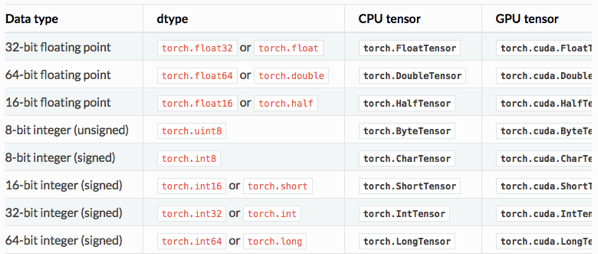

### 리스트를 텐서로 바꿀 때 타입 지정

In [ ]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


### 텐서에서 타입지정

In [ ]:
print(bt.long()) # 뒤에 붙이기만해도 타입이 바뀐다!
print(bt.float()) # 뒤에 붙이기만해도 타입이 바뀐다!

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 2. 텐서 조작 - 12) 연결하기 : cat => 차원을 먼저 늘린 후에, 쌓아야 함

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [ ]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 2. 텐서 조작 - 13) 쌓기 또는 스택킹(Stacking) => 알아서 차원이 늘어남

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [ ]:
# 세로방향으로 쌓기
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# 가로방향으로 쌓기
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
# cat은 좀 다르죠?
print(torch.cat([x, y, z], dim=0))

tensor([1., 4., 2., 5., 3., 6.])


In [ ]:
# 그래서 차원을 합칠때의 차원으로 먼저 만들어줘야 한다!
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### 2. 텐서 조작 - 14) ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서


In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
print(torch.ones_like(x)) # x와 동일한 차원의 one 텐서를 만든다.

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print(torch.zeros_like(x)) # x와 동일한 차원의 zero 텐서를 만든다.

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 2. 텐서 조작 - 15) 덮어쓰기 연산 : 중요!!!


In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
print(x) # 기존의 값 출력

tensor([[1., 2.],
        [3., 4.]])


### _를 붙이면 계산과 동시에 기존의 값을 덮어쓰기 합니다.

In [ ]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
print(x) # 기존의 값 출력 (덮어쓰기 됨)

tensor([[2., 4.],
        [6., 8.]])


# 텐서 끝============================================================================

## 3. Pytorch 딥러닝

### 1) torch를 사용하여 선형회귀로 대략적인 구조를 알아보자

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# 컴퓨터에 있는 random seed table은 컴퓨터마다 다르므로,
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

In [ ]:
# 데이터가 1, 2, 3 즉 3개가 있고, 정답 값도 2, 4, 6으로 3개가 있는걸 확인할 수 있다.
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# torch.FloatTensor : 토치에서는 텐서만 가능 (numpy는 안 됨)

In [ ]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [ ]:
# 가중치 W를 0으로 초기화하고, 학습(back prop)을 통해 값이 변경되는 변수임(requires_grad=True)을 명시함.
W = torch.zeros(1, requires_grad=True)
# requires_grad는 기울기를 학습히가 위해 설정함.

# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


In [ ]:
# 가중치 b를 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시함.
b = torch.zeros(1, requires_grad=True)

# 가중치 b를 출력
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# 확률적 경사하강법(SGD), 첫번째 인자는 최적화 시킬 learnable parameter를 주고([W, b]), 두번째 인자는 학습률(lr)을 명시해준다.
optimizer = optim.SGD([W, b], lr=0.01)

In [ ]:
nb_epochs = 100 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # 선형회귀 모델
    predict = x_train * W + b
    """
               [[1],    *   [0]     =>  [[0],       +       [0]     =   [[0],
                [2],                     [0]                             [0]
                [3]]                     [0]]                            [0]]

    """
    # cost 계산 (Mean Square Error)
    cost = torch.mean((predict - y_train) ** 2) # ** : 제곱
    '''
    [[0],       -       [[2],       =  ([[-2],
     [0],                [4],            [-4],
     [0]]                [6]]            [-6]]) ** 2
    '''

    # cost로 모델 개선
    optimizer.zero_grad() # (n번 학습할 때마다) 기울기 초기화
    cost.backward() # cost를 기반으로 미분(접선의 기울기) 계산
    optimizer.step() # 오차역전파법(back prop) 실행

    # 100번마다 로그 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/100 W: 0.187, b: 0.080 Cost: 18.666666
Epoch   10/100 W: 1.224, b: 0.516 Cost: 1.844294
Epoch   20/100 W: 1.550, b: 0.638 Cost: 0.239337
Epoch   30/100 W: 1.655, b: 0.665 Cost: 0.083519
Epoch   40/100 W: 1.693, b: 0.662 Cost: 0.065829
Epoch   50/100 W: 1.709, b: 0.650 Cost: 0.061424
Epoch   60/100 W: 1.719, b: 0.636 Cost: 0.058413
Epoch   70/100 W: 1.726, b: 0.621 Cost: 0.055656
Epoch   80/100 W: 1.733, b: 0.607 Cost: 0.053039
Epoch   90/100 W: 1.739, b: 0.592 Cost: 0.050546
Epoch  100/100 W: 1.746, b: 0.578 Cost: 0.048171


### ※ optimizer.zero_grad()가 필요한 이유

### 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징(단점)이 있다

In [ ]:
import torch
w = torch.tensor(2.0, requires_grad=True)
optimizer = optim.SGD([w], lr=0.01)
nb_epochs = 20
for epoch in range(nb_epochs + 1):

  #optimizer.zero_grad()
  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


### 2) 다중 선형 회귀를 matmul로 구현해보자
* 다중(multinomial) 회귀: y = WX + WX + WX + b
* 비교: 다항(polynomial) 회귀: y = WX^2 + WX + b

In [ ]:
# 해석하자면, 5개의 데이터가 있고, 각 데이터(X)는 3개씩 특성(피처)이 있습니다. => X = 5 x 3
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])

# 데이터(X)가 5개니까 정답(Y)이 5개 => Y = X*W =  (5x3) * (3x1) = 5 x 1
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [ ]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)     # 피처가 3개니까, y = wx + wx + wx + b => W = 3 x 1
b = torch.zeros(1, requires_grad=True)          # b는 브로드캐스팅 연산을 하므로, 1

In [ ]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # 모델
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    predict = x_train.matmul(W) + b

    # [[첫번째데이터예측값],
    #  [두번째데이터예측값],
    #  [세번째데이터예측값],
    #  [네번째데이터예측값],
    #  [다섯번째데이터예측값],]

    # cost 계산 Mean Square Error
    cost = torch.mean((predict - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} predict: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, predict.squeeze().detach(), cost.item() # detach는 기울기가 전파되지 않는 텐서를 만드는 것
    ))

Epoch    0/20 predict: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 predict: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 predict: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 predict: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 predict: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 predict: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 predict: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 predict: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 predict: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 predict: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 predict: tensor([153.5285, 184.48

In [ ]:
predict.squeeze() #  grad_fn=<SqueezeBackward0> 이것을 없애려면 detach()를 해야한다.

tensor([154.0523, 185.1094, 175.7694, 198.6045, 141.2187],
       grad_fn=<SqueezeBackward0>)

In [ ]:
predict.detach().squeeze()

tensor([154.0536, 185.1134, 175.7451, 198.6145, 141.2158])

### 3) 다중 선형 회귀를 nn과 F를 이용해서 학습해보자

In [ ]:
import torch
import torch.nn as nn   # nn : 방정식 만드는 모듈
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# 해석하자면, 5개의 데이터가 있고, 각 데이터는 3개씩 특성이 있습니다.
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])

# 데이터가 5개니까 정답이 5개
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)  # y = wx + wx + wx + b

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7e461faede00>

In [ ]:
print(list(model.parameters())) # model.parameters()에는 weights 3개와 b 1개가 들어있다는 것을 확인할 수 있어요!

[Parameter containing:
tensor([[ 0.0803, -0.0707,  0.1601]], requires_grad=True), Parameter containing:
tensor([0.0285], requires_grad=True)]


In [ ]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 1e-5
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) # 첫번째 인자는 당연히 weight 3개와 b 1개가 들어있는 model.parameters() 겠죠?

# SGD 외 사용가능 한 방법 : AdamW, NAdam, Adam
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

In [ ]:
# 전체 훈련 데이터에 대해 경사 하강법을 20번 반복
nb_epochs = 20
for epoch in range(nb_epochs+1):
    # 모델
    prediction = model(x_train)
    # 만약 에러로 안될 시 debug 방법
    # break를 추가한 뒤
    # print(x_train.shape) 를 확인해 feature를 확인하기.

    # cost 계산 F 모듈에 MSE를 지원해줍니다
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad() # gradient를 0으로 초기화
    cost.backward()     # 비용 함수를 미분하여 gradient 계산
    optimizer.step() # W와 b를 업데이트 (back prop)

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/20 Cost: 39535.226562
Epoch    1/20 Cost: 39534.207031
Epoch    2/20 Cost: 39533.183594
Epoch    3/20 Cost: 39532.164062
Epoch    4/20 Cost: 39531.148438
Epoch    5/20 Cost: 39530.125000
Epoch    6/20 Cost: 39529.105469
Epoch    7/20 Cost: 39528.085938
Epoch    8/20 Cost: 39527.070312
Epoch    9/20 Cost: 39526.050781
Epoch   10/20 Cost: 39525.031250
Epoch   11/20 Cost: 39524.007812
Epoch   12/20 Cost: 39522.992188
Epoch   13/20 Cost: 39521.968750
Epoch   14/20 Cost: 39520.953125
Epoch   15/20 Cost: 39519.929688
Epoch   16/20 Cost: 39518.914062
Epoch   17/20 Cost: 39517.894531
Epoch   18/20 Cost: 39516.871094
Epoch   19/20 Cost: 39515.851562
Epoch   20/20 Cost: 39514.835938


### 임의의 데이터로 학습된 모델에 넣어 예측해보자!

In [ ]:
# 임의의 데이터
new_var =  torch.FloatTensor([[73, 80, 75]])  # 데이터 x 피쳐갯수 # 1 X 3

# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) # 여기서 문제, 왜 predict 값이 2차원일까요? => 학습을 2차원으로 했기 때문에, 예측도 2차원으로

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[12.2422]], grad_fn=<AddmmBackward0>)


In [ ]:
# 훈련이 완료되었을 때 모델 파라미터들을 확인해보자.
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0803, -0.0707,  0.1601]], requires_grad=True), Parameter containing:
tensor([0.0285], requires_grad=True)]


### 4) 다중 선형회귀 클래스형태로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# 데이터까지는 동일
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
class MLRegression(nn.Module): # MultivariateLinearRegression
    def __init__(self):
        super().__init__() # nn.Module 상속, 이와 같은 코드 super(MLRegression, self).__init__()
        self.linear = nn.Linear(3, 1) # 모델 선언 : 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x): # forward : 순전파 기능하는 특수 메소드
        return self.linear(x)

↑ nn.Module 상속하는 이유 https://daebaq27.tistory.com/60

In [ ]:
model = MLRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 100
for epoch in range(nb_epochs+1):
    # 모델
    prediction = model(x_train) # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad() # gradient를 0으로 초기화
    cost.backward() # 비용 함수를 미분하여 gradient 계산
    optimizer.step() # W와 b를 업데이트

    if epoch % 10 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100 Cost: 53926.019531
Epoch   10/100 Cost: 1.486503
Epoch   20/100 Cost: 0.988497
Epoch   30/100 Cost: 0.984174
Epoch   40/100 Cost: 0.979866
Epoch   50/100 Cost: 0.975582
Epoch   60/100 Cost: 0.971322
Epoch   70/100 Cost: 0.967093
Epoch   80/100 Cost: 0.962887
Epoch   90/100 Cost: 0.958698
Epoch  100/100 Cost: 0.954530


### 5) 미니배치 학습을 구현해보자
* 미니배치 학습 목적/이유: 1) 리로스 한계 2) loss를 한번에 반영할 양을 조절
* 미니배치 사이즈는 내가 사용하는 pc의 성능에 맞게 맥시멈으로 설정하는 것을 추천.(2진수로 설정하는 것을 추천)
* 미니배치 사이즈를 맥스로 주고 터질 경우 보통 사이즈를 줄여 돌리는데 그럼에도 또 터지는경우 두가지의 경우로 나뉨.
 - 1) 리소스가 부족함.
 - 2) 좀비프로세스가 있을 수 있음.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import TensorDataset # 텐서데이터셋 : 인풋데이터와 정답값 데이터 짝꿍
from torch.utils.data import DataLoader # 데이터로더 : 미니배치 사이즈로 짜르려고

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
dataset = TensorDataset(x_train, y_train) # 미니배치로 짜르기 전에, 데이터와 정답을 합친 후에 짤라야 한다. => ex) ([73,  80,  75], [152])

In [ ]:
print(list(dataset))

[(tensor([73., 80., 75.]), tensor([152.])), (tensor([93., 88., 93.]), tensor([185.])), (tensor([89., 91., 90.]), tensor([180.])), (tensor([ 96.,  98., 100.]), tensor([196.])), (tensor([73., 66., 70.]), tensor([142.]))]


In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) # 자, 그러면 마지막은 어떻게 될까?
# 모델을 골고루 학습시키기 위해 shuffle = True를 작성.

In [ ]:
model = nn.Linear(3,1) # 다중선형회귀 클래스 모델과 다르지 않으니 당황하지 말 것
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
x = [10, 20, 30, 40]

for i in enumerate(x):
    print(i)

(0, 10)
(1, 20)
(2, 30)
(3, 40)


In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1): # 전체 데이터셋으로 몇번 학습할 것인가?
  for batch_idx, samples in enumerate(dataloader):  # enumerate : 값과 인덱스 return
    # print('번호', batch_idx) # 미니배치 번호
    # print('내용물', samples) # 미니배치 내용물 확인
    # break

    x_train, y_train = samples # 정답이랑 답이 묶여있으니까 쪼개줘야 하지 않는가?
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))



Epoch    0/20 Batch 1/3 Cost: 24936.144531
Epoch    0/20 Batch 2/3 Cost: 17614.294922
Epoch    0/20 Batch 3/3 Cost: 5407.775879
Epoch    1/20 Batch 1/3 Cost: 595.407959
Epoch    1/20 Batch 2/3 Cost: 343.235321
Epoch    1/20 Batch 3/3 Cost: 85.497025
Epoch    2/20 Batch 1/3 Cost: 27.431662
Epoch    2/20 Batch 2/3 Cost: 4.302781
Epoch    2/20 Batch 3/3 Cost: 0.528048
Epoch    3/20 Batch 1/3 Cost: 7.713828
Epoch    3/20 Batch 2/3 Cost: 1.038419
Epoch    3/20 Batch 3/3 Cost: 0.167203
Epoch    4/20 Batch 1/3 Cost: 4.662241
Epoch    4/20 Batch 2/3 Cost: 0.353117
Epoch    4/20 Batch 3/3 Cost: 0.017152
Epoch    5/20 Batch 1/3 Cost: 0.134863
Epoch    5/20 Batch 2/3 Cost: 3.944430
Epoch    5/20 Batch 3/3 Cost: 1.022494
Epoch    6/20 Batch 1/3 Cost: 3.404096
Epoch    6/20 Batch 2/3 Cost: 0.607614
Epoch    6/20 Batch 3/3 Cost: 2.461092
Epoch    7/20 Batch 1/3 Cost: 0.735763
Epoch    7/20 Batch 2/3 Cost: 0.584020
Epoch    7/20 Batch 3/3 Cost: 7.211588
Epoch    8/20 Batch 1/3 Cost: 1.616590
Epoch   

In [ ]:
# 임의의 데이터
new_var =  torch.FloatTensor([[73, 80, 75]])

# 입의의 데이터로 추론
pred_y = model(new_var) # 다중선형회귀 클래스 모델과 다르지 않으니 당황하지 말 것
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[150.3088]], grad_fn=<AddmmBackward0>)


### 실습) 다음 조건을 만족하는 다중 선형회귀 학습을 짜시오

1. 데이터는 아래 데이터 그대로 사용할 것
2. 그에 맞는 다중 선형회귀를 클래스 형태로 짤 것.
3. 미니배치사이즈 4
4. 에폭 10
5. 옵티마이저, loss 마음대로 선택. 단, 성능은 신경쓰지 말 것.
6. import는 마음대로 넣을 것.
7. x_test 변수를 이용해 예측해서 결과를 출력하고 기울기함수를 해제하시오: detach 사용

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75, 88],
                               [93,  88,  93, 87],
                               [89,  91,  90, 95],
                               [96,  98,  93, 95],
                               [73,  66,  70, 77],
                               [77,  82,  75, 86],
                               [88,  75,  91, 90]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142], [151], [155]])

In [ ]:
dataset = TensorDataset(x_train, y_train)
# DataLoader 및 모델 정의
dataLoader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
class MLRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 1)


    def forward(self, x): # forward : 순전파 기능하는 특수 메소드
        return self.linear(x)

In [ ]:
model = MLRegression()
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

In [ ]:
# 학습
nb_epochs = 10
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataLoader):
        x_train, y_train = samples
        # 순전파 및 손실 계산
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        # 역전파 및 가중치 갱신
        cost.backward()
        optimizer.step()
        print('Epoch {:4d}/{} Predict: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, prediction.squeeze().detach(), cost.item() # detach는 기울기가 전파되지 않는 텐서를 만드는 것
        ))

Epoch    0/10 Predict: tensor([92.4139, 77.5027, 70.4467, 84.4485]) Cost: 6557.326172
Epoch    0/10 Predict: tensor([137.4899, 136.2309, 118.8765]) Cost: 1760.899536
Epoch    1/10 Predict: tensor([211.0925, 187.0935, 223.1238, 213.2360]) Cost: 955.971985
Epoch    1/10 Predict: tensor([232.9375, 255.0297, 212.2916]) Cost: 7165.907715
Epoch    2/10 Predict: tensor([273.4331, 239.1055, 276.2888, 242.3884]) Cost: 8257.785156
Epoch    2/10 Predict: tensor([215.1270, 237.4823, 179.1147]) Cost: 2237.844971
Epoch    3/10 Predict: tensor([147.5416, 117.8534, 130.5633, 141.4438]) Cost: 646.903870
Epoch    3/10 Predict: tensor([89.3268, 73.3731, 85.1500]) Cost: 8852.625000
Epoch    4/10 Predict: tensor([71.0699, 78.7589, 82.0758, 86.6163]) Cost: 8730.141602
Epoch    4/10 Predict: tensor([139.5226, 110.4128, 122.4407]) Cost: 1150.599487
Epoch    5/10 Predict: tensor([204.9564, 216.6015, 170.7803, 214.6599]) Cost: 1385.832153
Epoch    5/10 Predict: tensor([237.8705, 234.4012, 284.0810]) Cost: 7364.

In [ ]:
# 테스트
x_test = torch.FloatTensor([[73,  80,  75, 88]])

predicted_value = model(x_test)


print(f'예측 결과: {predicted_value.detach()}')

예측 결과: tensor([[135.5999]])


### 6) 커스텀 데이터셋을 이용해서 다중 선형회귀 모델을 학습해보자 ★★★★★

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
# Dataset 상속
class CustomDataset(Dataset):   # CustomDataset : 특수 메소드
  def __init__(self): # 데이터 load 또는 선언, 그리고 전처리를 정의하는 곳
    self.x_data = [[73, 80, 75],    # 여기서는 보통 파일을 불러오거나, 파일 경로 리스트를 정의함.
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self): # 총 데이터의 개수를 구하는 이벤트가 발생할 때, 실행되는 함수
    return len(self.x_data)

  def __getitem__(self, idx):  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
                               # idx가 뭔지 생각해보자.
    # print("반응함", idx)
    # 여기서 transform 함수를 데이터에 적용하기도 한다
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = torch.nn.Linear(3,1) # y = w1x1 + w2x2 + w3x3 +b # 다중선형회귀 클래스 모델과 다르지 않으니 당황하지 말 것
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 28405.291016
Epoch    0/20 Batch 2/3 Cost: 9567.865234
Epoch    0/20 Batch 3/3 Cost: 3371.747314
Epoch    1/20 Batch 1/3 Cost: 940.618652
Epoch    1/20 Batch 2/3 Cost: 166.937469
Epoch    1/20 Batch 3/3 Cost: 117.034592
Epoch    2/20 Batch 1/3 Cost: 18.569712
Epoch    2/20 Batch 2/3 Cost: 5.722846
Epoch    2/20 Batch 3/3 Cost: 4.356612
Epoch    3/20 Batch 1/3 Cost: 0.011408
Epoch    3/20 Batch 2/3 Cost: 0.670312
Epoch    3/20 Batch 3/3 Cost: 0.545826
Epoch    4/20 Batch 1/3 Cost: 0.291414
Epoch    4/20 Batch 2/3 Cost: 0.353402
Epoch    4/20 Batch 3/3 Cost: 0.091768
Epoch    5/20 Batch 1/3 Cost: 0.371046
Epoch    5/20 Batch 2/3 Cost: 0.249317
Epoch    5/20 Batch 3/3 Cost: 0.093683
Epoch    6/20 Batch 1/3 Cost: 0.269953
Epoch    6/20 Batch 2/3 Cost: 0.351009
Epoch    6/20 Batch 3/3 Cost: 0.090231
Epoch    7/20 Batch 1/3 Cost: 0.367206
Epoch    7/20 Batch 2/3 Cost: 0.262912
Epoch    7/20 Batch 3/3 Cost: 0.082195
Epoch    8/20 Batch 1/3 Cost: 0.308693
Epoch   

1. for문에서 dataloader에서 데이터를 가지고 오려함.
2. dataloader에서 batch 사이즈만큼 데이터를 가져오라고 dataset한테 명령함.
3. dataset이 넵! 하면서 미니배치 갯수만큼 1개씩 준비함. 그 다음에 미니배치 갯수만큼 쌓이면 리턴

###실습) 누군가 학습 코드를 망가뜨려 놓았다. 잘 돌아가도록 코드를 수정하시오.

In [ ]:
import torch  # 딥러닝 프레임워크 파이토치 불러오기
import torch.autograd # 자동 미분(back prop)을 위함 함수들 포함
import torch.nn  as nn# 간단한 선형 방정식 정의, 다양한 레이어, 활성화 함수,
import torch.optim # 최적화 알고리즘들이 담겨있는 모듈
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
class MultivariateLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1) #수정

    def forward(self, x):
        return self.linear(x)

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) #수정
model = MultivariateLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) #수정

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1): #수정
  for batch_idx, samples in enumerate(dataloader): #수정
    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train) #수정


    optimizer.zero_grad() #수정
    cost.backward() #수정
    optimizer.step() #수정

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 74853.500000
Epoch    0/20 Batch 2/3 Cost: 12569.371094
Epoch    0/20 Batch 3/3 Cost: 3910.828857
Epoch    1/20 Batch 1/3 Cost: 1870.083496
Epoch    1/20 Batch 2/3 Cost: 789.580078
Epoch    1/20 Batch 3/3 Cost: 322.302094
Epoch    2/20 Batch 1/3 Cost: 50.567638
Epoch    2/20 Batch 2/3 Cost: 18.587353
Epoch    2/20 Batch 3/3 Cost: 1.963958
Epoch    3/20 Batch 1/3 Cost: 3.067092
Epoch    3/20 Batch 2/3 Cost: 1.203943
Epoch    3/20 Batch 3/3 Cost: 0.002258
Epoch    4/20 Batch 1/3 Cost: 0.753071
Epoch    4/20 Batch 2/3 Cost: 0.624079
Epoch    4/20 Batch 3/3 Cost: 0.000877
Epoch    5/20 Batch 1/3 Cost: 0.353301
Epoch    5/20 Batch 2/3 Cost: 0.645633
Epoch    5/20 Batch 3/3 Cost: 0.832027
Epoch    6/20 Batch 1/3 Cost: 0.747636
Epoch    6/20 Batch 2/3 Cost: 0.694765
Epoch    6/20 Batch 3/3 Cost: 0.724509
Epoch    7/20 Batch 1/3 Cost: 0.320990
Epoch    7/20 Batch 2/3 Cost: 1.331238
Epoch    7/20 Batch 3/3 Cost: 0.036601
Epoch    8/20 Batch 1/3 Cost: 0.455575
Epoch

In [ ]:
# 함수 구성요소 보기
from inspect import signature

signature(torch.optim.SGD)

<Signature (params, lr: float = 0.001, momentum: float = 0, dampening: float = 0, weight_decay: float = 0, nesterov=False, *, maximize: bool = False, foreach: Optional[bool] = None, differentiable: bool = False, fused: Optional[bool] = None)>

In [ ]:
# 함수명 찾는법
import sklearn.preprocessing
dir(sklearn.preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 'TargetEncoder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 '_target_encoder',
 '_target_encoder_fast',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

# 파이토치 선형회귀 끝
================================================================================

### 7) Multi Layer Perceptron == MLP == 다층퍼셉트론을 통한 회귀

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X = torch.randn(100, 10)  # 임의의 입력 데이터 (100개 데이터, 10차원)
y = torch.randn(100, 1)   # 임의의 출력 랜덤 데이터 (100개 데이터, 1차원)

dataset = TensorDataset(X, y) # 인풋데이터와 아웃풋을 짝꿍으로 묶어준다.
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)  # 배치사이즈 10개씩 묶는다.

class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(10, 64) # 10개 입력, input 개수를 맞추기. 그 후 2진수값으로 다음 노드갯수를 작성
        self.layer2 = nn.Linear(64, 32) # layer1에서 작성된 노드갯수를 맟추어 적고 마찬가지로 노드 갯수를 작성
        self.output_layer = nn.Linear(32, 1) # 1개 출력(강사님이 추천하는 형태는 항아리 형태)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        predictions = model(batch_X)

        loss = criterion(predictions, batch_y)
        optimizer.zero_grad()

        # 기울기 계산 후 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 0.9440
Epoch [4/10], Loss: 0.7113
Epoch [6/10], Loss: 1.1891
Epoch [8/10], Loss: 1.2068
Epoch [10/10], Loss: 2.2669


In [ ]:
# 모델 평가 모드
# model.train() : 학습모드
model.eval() # 드롭아웃(dropout)과 배치 정규화(batch normalization)와 같은 레이어가 고정됨
with torch.no_grad(): # 기울기를 안구하겠다고 정의, optimizer.step()을 안하면 되지 않냐라고 볼 수 있지만,
                      # autograd 엔진이 그래디언트 계산을 위한 기록을 하지 않기 때문에 메모리를 더 적게 사용
    predictions = model(X)
    loss = criterion(predictions, y)
    print(f'Final Loss: {loss.item():.4f}')


Final Loss: 1.2778


## 8) wine.csv 데이터를 이용하여 MLP 학습 및 평가 모델을 만들어보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('./wine.csv')

# 입력과 출력 분리
X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# 텐서 변환 (직관적인 방식)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_valid = torch.FloatTensor(X_valid)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
# 텐서 변환 (유연한 데이터 비트 정의 방식)
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# X_valid = torch.tensor(X_valid, dtype=torch.float32)
# y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:

        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)

        # 기울기 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 0.7709
Epoch [4/10], Loss: 1.1348
Epoch [6/10], Loss: 0.7032
Epoch [8/10], Loss: 0.2217
Epoch [10/10], Loss: 0.1579


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 loss: {loss.item():.4f}')


평가 loss: 0.3778


In [ ]:
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


예측 값: [12.267521858215332, 8.772706031799316, 11.809419631958008, 9.482593536376953, 9.115379333496094]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 9) 파생변수 만들어서 학습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
print(cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 1 1 1]


In [ ]:
# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler() # 리스케일링
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 0.7166
Epoch [4/10], Loss: 0.6384
Epoch [6/10], Loss: 1.0000
Epoch [8/10], Loss: 0.6690
Epoch [10/10], Loss: 0.3805


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 loss: {loss.item():.4f}')


평가 loss: 0.4828


In [ ]:
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


예측 값: [12.315062522888184, 9.141766548156738, 11.538082122802734, 9.751766204833984, 8.648266792297363]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 실습) 파생변수 만들고 아래 3가지 중 1개 스케일러를 사용해서 학습해보자
#### 1) Standard Scaler
#### 2) MinMax Scaler
#### 3) Robust Scaler

#### 조건) 클러스터 갯수, 모델 히든사이즈 다르게 작성할 것

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # 힌트

# 데이터 로드
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택


# 아래 마저 완성

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)
print(cluster_labels)

[0 0 0 ... 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = RobustScaler() # 리스케일링
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = MLPRegression()


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [2/10], Loss: 0.8140
Epoch [4/10], Loss: 0.6442
Epoch [6/10], Loss: 0.2620
Epoch [8/10], Loss: 0.0933
Epoch [10/10], Loss: 0.0417


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 loss: {loss.item():.4f}')


평가 loss: 0.2981


In [ ]:
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


예측 값: [12.581772804260254, 10.356541633605957, 12.0737886428833, 9.666379928588867, 9.45884895324707]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 10) kfold를 사용해보자 (StratifiedKFold, TimeSeriesKFold는 현재 회귀 데이터에 적합하지 않다.)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 데이터 로드
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 정규화
scaler = StandardScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화

# 데이터를 텐서로 변환
X_extended = torch.tensor(X_extended, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.layer1 = nn.Linear(X_extended.shape[1], 64)  # 입력 차원
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# 교차 검증 루프
fold = 1
valid_losses = [] # 매 fold마다 loss를 저장할 것이다. 5 fold니까 총 5개의 loss를 담을 수 있다.
for train_index, valid_index in kf.split(X_extended): # kf.split X_extemded 데이터에서 5폴드에서 첫번째 train데이터(인풋, 정답)
                                                      # valid 데이터(인풋, 정답) 인덱스를 각각 가져온다.
    #print(train_index, valid_index)
    #break
    # 학습 및 검증 데이터 분리, 이때 매번 kfold의 인덱스를 가져와서 인덱싱 해온다.
    X_train, X_valid = X_extended[train_index], X_extended[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    # 데이터셋과 데이터로더로 변환
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    model = MLPRegression()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    num_epochs = 10

    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            # 예측값 계산
            predictions = model(batch_X)

            # 손실 계산
            loss = criterion(predictions, batch_y)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()

        if (epoch+1) % 2 == 0:
            print(f'Fold [{fold}], Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # 평가 모드로 바꾼다.
    model.eval()
    with torch.no_grad():
        predictions = model(X_valid)
        valid_loss = criterion(predictions, y_valid)
        valid_losses.append(valid_loss.item())
        print(f'Fold [{fold}] Valid Loss: {valid_loss.item():.4f}')

    fold += 1

# 최종적으로 평가 손실 출력
print(f'\n평균 평가 손실: {np.mean(valid_losses):.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fold [1], Epoch [2/10], Loss: 1.0446
Fold [1], Epoch [4/10], Loss: 0.8965
Fold [1], Epoch [6/10], Loss: 0.6084
Fold [1], Epoch [8/10], Loss: 0.2232
Fold [1], Epoch [10/10], Loss: 0.2887
Fold [1] Valid Loss: 0.3589
Fold [2], Epoch [2/10], Loss: 1.0335
Fold [2], Epoch [4/10], Loss: 0.9282
Fold [2], Epoch [6/10], Loss: 0.3515
Fold [2], Epoch [8/10], Loss: 0.7345
Fold [2], Epoch [10/10], Loss: 0.4194
Fold [2] Valid Loss: 0.5292
Fold [3], Epoch [2/10], Loss: 0.7205
Fold [3], Epoch [4/10], Loss: 2.7662
Fold [3], Epoch [6/10], Loss: 0.7691
Fold [3], Epoch [8/10], Loss: 0.5557
Fold [3], Epoch [10/10], Loss: 0.2789
Fold [3] Valid Loss: 0.4751
Fold [4], Epoch [2/10], Loss: 2.4457
Fold [4], Epoch [4/10], Loss: 0.8176
Fold [4], Epoch [6/10], Loss: 1.8002
Fold [4], Epoch [8/10], Loss: 0.6212
Fold [4], Epoch [10/10], Loss: 0.4668
Fold [4] Valid Loss: 0.3805
Fold [5], Epoch [2/10], Loss: 1.7986
Fold [5], Epoch [4/10], Loss: 1.0825
Fold [5], Epoch [6/10], Loss: 0.8040
Fold [5], Epoch [8/10], Loss: 0.6

### 11) 레이어를 많이 쌓아보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')

    # tensor -> Numpy로 변환하여 계산
    y_valid_np = y_valid.numpy()
    predictions_np = predictions.numpy()

    r2 = r2_score(y_valid_np, predictions_np)
    rmse = np.sqrt(mean_squared_error(y_valid_np, predictions_np))
    mae = mean_absolute_error(y_valid_np, predictions_np)
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 0.4721
Epoch [4/10], Loss: 0.3568
Epoch [6/10], Loss: 0.7365
Epoch [8/10], Loss: 0.2483
Epoch [10/10], Loss: 0.1632
평가 손실 Loss: 0.2742
R2 Score: 0.8088
RMSE: 0.5236
MAE: 0.3864
예측 값: [11.768940925598145, 9.691259384155273, 11.987454414367676, 9.796913146972656, 8.892040252685547]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 실습) 모델을 한번 쌓고, 노드(퍼셉트론)를 늘려보고, 나만의 모델을 만들어보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1],128)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(128, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.layer6 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = torch.relu(self.layer6(x))
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 0.3011
Epoch [4/10], Loss: 0.6011
Epoch [6/10], Loss: 0.3025
Epoch [8/10], Loss: 0.3222
Epoch [10/10], Loss: 0.1965
평가 손실 Loss: 0.2789
예측 값: [12.003520965576172, 9.67622184753418, 12.099507331848145, 9.643659591674805, 9.146650314331055]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 12) 어떤 옵티마이저들이 있을까 (학습률 decay, 규제(weight decay) 적용)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()

# weight decay 즉, 규제 패널티 강도는 weight 크기가 줄어들도록(오버피팅일 때), 학습률 dacy는 보폭을 줄도록 (loss 값이 날뛸 때 즉, Over shooting 일 때)

                                                  # 규제 패널티 강도 0.1 (weight decay), 모델의 가중치가 커지지 않도록 제어, 오버피팅 일때 써봄직함
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.1)
#optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
#optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.1)
#optimizer = optim.NAdam(model.parameters(), lr=0.001, weight_decay=0.1)
                                                      # 2번 학습(epoch)할때마다 학습률값에서 10% 감소한 수치로 조정 (learning rate decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    # 학습률 decay
    scheduler.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 0.6966
Epoch [4/10], Loss: 0.2905
Epoch [6/10], Loss: 0.5331
Epoch [8/10], Loss: 0.6452
Epoch [10/10], Loss: 1.8163
평가 손실 Loss: 0.7062
예측 값: [11.940629959106445, 9.111295700073242, 10.856183052062988, 9.811785697937012, 9.109477043151855]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 13) Early stop, tqdm, log를 남겨보자

In [ ]:
from tqdm import tqdm

count = 0
for i in tqdm(range(10000000)):
  count +=1

count = 1

100%|██████████| 10000000/10000000 [00:03<00:00, 3237728.46it/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import os

data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화 (클러스터 라벨의 의미를 왜곡할 수 있음!)
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # X_train.shape[1]은 입력 차원
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = self.output_layer(x)
        return x

model = DNNRegression()
criterion = nn.MSELoss()

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

# Early Stopping 설정
early_stopping_patience = 5  # 평가 loss 개선이 없을 경우, 모델한테 줄 기회 횟수.
early_stopping_counter = 0
best_loss = float('inf') # 맨 처음 로스를 모르니까 무한으로 잡아놓고 bestloss를 갱신할거다.

# 로그 파일(현재 작업 디렉토리에 저장이 된다.)
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

num_epochs = 10

pbar = tqdm(range(num_epochs), desc="Training")

# tqdm으로 에폭 루프 감싸기
for epoch in pbar:
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:

        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

        # 에폭 손실 계산
        epoch_loss += loss.item()

    # 학습률 업데이트
    scheduler.step()

    # 평가 손실 계산
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_valid)
        val_loss = criterion(val_predictions, y_valid)

    # log 파일에다가 정보 기록
    with open(log_file, "a") as f:
        f.write(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

    # tqdm 진행 표시줄에 정보 반영
    pbar.set_postfix({'Loss': f'{epoch_loss/len(train_loader):.4f}', 'Valid Loss': f'{val_loss.item():.4f}'})

  # early stop을 하기위한 코드 {
    # validation loss가 현재까지 갱신된 최저 loss보다 적다면 best loss를 갱신
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        early_stopping_counter = 0

        # 성능이 뛰어날때 마다 모델을 저장
        torch.save(model.state_dict(), "best_model.pth")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print(f"조기종료 epoch: {epoch+1}")
            break
#   }
# 모델 불러온 다음에 예측
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    final_loss = criterion(predictions, y_valid)
    print(f'\nFinal 평가 손실 Loss: {final_loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s, Loss=0.4847, Valid Loss=0.6111]


Final 평가 손실 Loss: 0.6111
예측 값: [12.989669799804688, 9.360710144042969, 11.911775588989258, 9.606197357177734, 8.83678913116455]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]



<ipython-input-28-f25c3d2ad159>:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


### 14) 가중치 초기화, 배치노말, 드롭아웃을 적용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(128, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(32, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x): # 배치노말라이제이션을 하고 activation function을 하는것으로 알려져있다.
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules(): # 딥러닝 모델의 모든 층을 훓음
            if isinstance(m, nn.Linear): # 만약 그 부분이 Layer 라면
                nn.init.xavier_uniform_(m.weight) # 그 부분의 웨이트를 자비에 유니폼으로 초기화 한다.
                if m.bias is not None:  # 만약 그 Layer가 None이 아니라면 0으로 초기화 한다.
                    nn.init.zeros_(m.bias)

# 모델, 손실 함수, 옵티마이저 설정
model = DNNRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 9.5438
Epoch [4/10], Loss: 8.9491
Epoch [6/10], Loss: 7.5224
Epoch [8/10], Loss: 6.4373
Epoch [10/10], Loss: 5.9476
평가 손실 Loss: 1.7795
예측 값: [9.952756881713867, 9.890437126159668, 10.10421371459961, 9.494795799255371, 9.55027961730957]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]


### 15) GPU 학습 (데이터가 크거나, 모델이 클 때 학습 속도가 개선되는걸 체감)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import time  # 시간 측정을 위한 모듈

# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터를 훈련/테스트 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # 클러스터 레이블 제외하고 정규화
X_valid[:, :-1] = scaler.transform(X_valid[:, :-1])

# 데이터를 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(128, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(32, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# 모델, 손실 함수, 옵티마이저 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # GPU가 사용 가능한지 확인
model = DNNRegression().to(device)  # 모델을 GPU로 이동
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

# 학습 시간 측정 시작
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 데이터를 GPU로 이동

        # 예측값 계산
        predictions = model(batch_X)

        # 손실 계산
        loss = criterion(predictions, batch_y)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 역전파 및 가중치 갱신
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 학습 시간 측정 종료
end_time = time.time()
elapsed_time = end_time - start_time

model.eval()
with torch.no_grad():
    X_valid, y_valid = X_valid.to(device), y_valid.to(device)  # 검증 데이터도 GPU로 이동
    predictions = model(X_valid)
    loss = criterion(predictions, y_valid)
    print(f'평가 손실 Loss: {loss.item():.4f}')

# 결과 출력
print(f"예측 값: {predictions[:5].view(-1).tolist()}")
print(f"실제 값: {y_valid[:5].view(-1).tolist()}")

# 전체 학습 시간 출력
print(f"총 학습 시간: {elapsed_time:.2f}초")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch [2/10], Loss: 11.6056
Epoch [4/10], Loss: 9.9257
Epoch [6/10], Loss: 10.0903
Epoch [8/10], Loss: 7.1888
Epoch [10/10], Loss: 16.8232
평가 손실 Loss: 1.8489
예측 값: [10.381800651550293, 9.798466682434082, 10.07437515258789, 9.76611328125, 9.66488265991211]
실제 값: [12.199999809265137, 9.899999618530273, 12.0, 9.5, 8.899999618530273]
총 학습 시간: 2.86초


# 실습) 아래 정의된 와인 데이터를 가지고 아래 조건을 충족하여 학습 및 평가 코드를 작성하자.

1. 모델의 레이어는 5층 이상으로 노드수는 마음대로. (Drop Out과, 자비에 유니폼 초기화, 배치노말라이제이션 적용해보기)
2. Adam에 weight decay 0.1, learning rate decay 0.1을 설정 할 것.
3. kfold 5 적용.
4. tqdm과 early stopping 설정, best model을 저장하도록 할 것.
5. GPU를 통한 학습 및 평가 할 것

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os

# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')

X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 정규화
scaler = RobustScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화

# 데이터를 텐서로 변환
X_tensor = torch.tensor(X_extended, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [ ]:
class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(64, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

# Early Stopping 설정
early_stopping_patience = 5
early_stopping_counter = 0
best_loss = float('inf')

# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

valid_losses = []

for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[train_index], X_tensor[val_index]
    y_train_fold, y_valid_fold = y_tensor[train_index], y_tensor[val_index]

    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = DNNRegression().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

    # 학습 시간 측정 시작
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 데이터를 GPU로 이동

            # 예측값 계산
            predictions = model(batch_X)

            # 손실 계산
            loss = criterion(predictions, batch_y)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # 학습률 업데이트
        scheduler.step()

        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)

        # log 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")

        # Early Stopping
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0

            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기종료 epoch : {epoch+1}")
                break

    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    with torch.no_grad():
        predictions = model(X_valid_fold)
        final_loss = criterion(predictions, y_valid_fold)
        print(f'\nFinal 평가 손실 Loss: {final_loss.item():.4f}')

        print(f"예측 값: {predictions[:5].view(-1).tolist()}")
        print(f"실제 값: {y_valid_fold[:5].view(-1).tolist()}")

    # Kfold의 loss 모음
    valid_loss = criterion(predictions, y_valid_fold)
    valid_losses.append(valid_loss.item())
    print(f'Fold [{fold}] Valid Loss: {valid_loss.item():.4f}')

    fold += 1

Fold 1, Epoch 1/10, Loss: 94.5351, Valid Loss: 85.9394
Fold 1, Epoch 2/10, Loss: 51.5410, Valid Loss: 50.3349
Fold 1, Epoch 3/10, Loss: 34.2528, Valid Loss: 43.8395
Fold 1, Epoch 4/10, Loss: 31.7620, Valid Loss: 39.8974
Fold 1, Epoch 5/10, Loss: 30.1598, Valid Loss: 40.1377
Fold 1, Epoch 6/10, Loss: 30.0912, Valid Loss: 39.4252
Fold 1, Epoch 7/10, Loss: 30.3573, Valid Loss: 37.5908
Fold 1, Epoch 8/10, Loss: 30.0550, Valid Loss: 37.4730
Fold 1, Epoch 9/10, Loss: 29.8008, Valid Loss: 39.5871
Fold 1, Epoch 10/10, Loss: 29.9901, Valid Loss: 38.9123

Final 평가 손실 Loss: 37.4730
예측 값: [4.675724029541016, 3.4041576385498047, 3.4026360511779785, 2.700831890106201, 3.1392078399658203]
실제 값: [9.5, 9.199999809265137, 9.199999809265137, 9.300000190734863, 9.199999809265137]
Fold [1] Valid Loss: 37.4730
Fold 2, Epoch 1/10, Loss: 67.5148, Valid Loss: 64.1181
Fold 2, Epoch 2/10, Loss: 31.8194, Valid Loss: 31.0161
Fold 2, Epoch 3/10, Loss: 18.6401, Valid Loss: 26.3817
Fold 2, Epoch 4/10, Loss: 17.7384, 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os
# 데이터 로드 및 전처리
data = pd.read_csv('wine.csv')
X = data.drop(columns=['alcohol']).values  # 'alcohol' 열을 제외한 나머지 특성 사용
y = data['alcohol'].values  # 와인의 알콜을 종속 변수로 선택
# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values
# 데이터 정규화
scaler = RobustScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화
# 데이터를 텐서로 변환
X_tensor = torch.tensor(X_extended, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)
        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, 1)
        # 가중치 초기화
        self._initialize_weights()
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64
# K-Fold Cross Validation
kf = KFold(n_splits= 5,  shuffle=True, random_state=42)
fold = 1
# Early Stopping 설정
early_stopping_patience = 5
early_stopping_counter = 0
best_loss = float('inf')
# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)
# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
valid_losses = []
for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[  train_index   ], X_tensor[   val_index     ]
    y_train_fold, y_valid_fold = y_tensor[  train_index   ], y_tensor[     val_index   ]
    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    model = DNNRegression().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr= 0.001 , weight_decay= 0.1 )
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 2 , gamma = 0.1)
    # 학습 시간 측정 시작
    start_time = time.time()
    # 모델 epoch 다 돌고 조기종료 0으로 초기화.
    early_stopping_counter = 0
    best_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to( device)  # 데이터를 GPU로 이동
            predictions = model(batch_X)
            # 손실 계산
            loss = criterion(predictions, batch_y)
            # 옵티마이저 초기화
            optimizer.zero_grad()
            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        # 학습률 업데이트
        scheduler.step()
        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)
        # log 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")
        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")
        # Early Stopping
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0
            # 성능이 뛰어날때 마다 모델을 저장
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기종료 epoch: {epoch+1}")
                break
    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
        predictions = model(X_valid_fold)
        final_loss = criterion(predictions, y_valid_fold)
        valid_losses.append(criterion(predictions, y_valid_fold))
        print(f"Fold {fold} 평가 손실 Loss: {final_loss.item():.4f}")
        print(f"Fold {fold} 예측 값: {predictions[:5].view(-1).tolist()}")
        print(f"Fold {fold} 실제 값: {y_valid_fold[:5].view(-1).tolist()}")
    fold += 1
# Kfold의 loss 모음
print(valid_losses)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fold 1, Epoch 1/10, Loss: 97.6227, Valid Loss: 86.9232
Fold 1, Epoch 2/10, Loss: 54.6421, Valid Loss: 47.3515
Fold 1, Epoch 3/10, Loss: 35.7240, Valid Loss: 40.7432
Fold 1, Epoch 4/10, Loss: 33.7581, Valid Loss: 38.7217
Fold 1, Epoch 5/10, Loss: 32.0533, Valid Loss: 39.5835
Fold 1, Epoch 6/10, Loss: 31.5811, Valid Loss: 38.2905
Fold 1, Epoch 7/10, Loss: 31.8851, Valid Loss: 38.1235
Fold 1, Epoch 8/10, Loss: 32.0065, Valid Loss: 38.3401
Fold 1, Epoch 9/10, Loss: 31.4805, Valid Loss: 38.4936
Fold 1, Epoch 10/10, Loss: 31.9231, Valid Loss: 38.0961
Fold 1 평가 손실 Loss: 38.0961
Fold 1 예측 값: [4.052535057067871, 3.7539103031158447, 3.87625789642334, 2.967172145843506, 3.3692188262939453]
Fold 1 실제 값: [9.5, 9.199999809265137, 9.199999809265137, 9.300000190734863, 9.199999809265137]
Fold 2, Epoch 1/10, Loss: 109.7665, Valid Loss: 94.1766
Fold 2, Epoch 2/10, Loss: 64.0617, Valid Loss: 50.4518
Fold 2, Epoch 3/10, Loss: 43.6250, Valid Loss: 47.4947
Fold 2, Epoch 4/10, Loss: 40.4942, Valid Loss: 42.5

In [ ]:
# 그대로 평균 출력하면 에러가 나온다. cpu를 풀어주고 넘파이 평균연산을 해야한다.
print(f'\n평균 평가 손실: {np.mean(valid_losses):.4f}')

In [ ]:
import numpy as np

# valid_losses는 리스트이고 그 안에 있는것들이 cpu 이다.
valid_losses_np = [loss.cpu().numpy() for loss in valid_losses]

print(f'\n평균 평가 손실: {np.mean(valid_losses_np):.4f}')


평균 평가 손실: 34.0621


# ★ 실무 실습) 배포 받은 "전력사용량 예측 데이터"를 통해 자신만의 코드를 작성 해보자

1. 이제까지 배운 회귀 방법들을 통해 적용해보자.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.

 [시각화는 scatter plot, correlation plot. 통계는 describe 정도 출력해도 좋다.]

3. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os

# 데이터 로드 및 전처리
data = pd.read_csv('train.csv', encoding = 'cp949')

data['datetime'] = pd.to_datetime(data['date_time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  object        
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
 10  datetime    122400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 10.3+ MB


In [ ]:
data.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,datetime
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,2020-07-13 11:30:00.000000256
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,2020-06-01 00:00:00
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,2020-06-22 05:45:00
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,2020-07-13 11:30:00
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,2020-08-03 17:15:00
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,2020-08-24 23:00:00
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,NaN




*   각 컬럼별 상관계수 확인



In [ ]:
df = data.drop(columns = 'date_time')
df.corr()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,datetime
num,1.000000e+00,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,6.103135e-02,9.918068e-02,8.730231e-13
전력사용량(kWh),-6.319335e-02,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,1.507991e-01,1.163441e-01,5.716262e-02
기온(°C),3.631250e-04,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,1.906651e-02,2.586485e-02,4.034679e-01
풍속(m/s),-5.218413e-02,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,6.274912e-03,-7.655996e-02,3.676991e-02
습도(%),5.378530e-03,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-3.140481e-02,-2.065729e-02,3.373499e-01
강수량(mm),-4.673261e-03,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-3.559549e-03,-1.668520e-02,8.470429e-02
일조(hr),-1.368529e-02,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-5.694932e-03,-8.412045e-03,-1.318590e-01
비전기냉방설비운영,6.103135e-02,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000e+00,8.484178e-02,2.730330e-13
태양광보유,9.918068e-02,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,8.484178e-02,1.000000e+00,1.208425e-13
datetime,8.730231e-13,0.057163,0.403468,0.036770,0.337350,0.084704,-0.131859,2.730330e-13,1.208425e-13,1.000000e+00


- 날짜별로 그룹화하여 전력 사용량을 합산
- 날짜별 전력 사용량을 시각화 하기 위해 groupby 사용

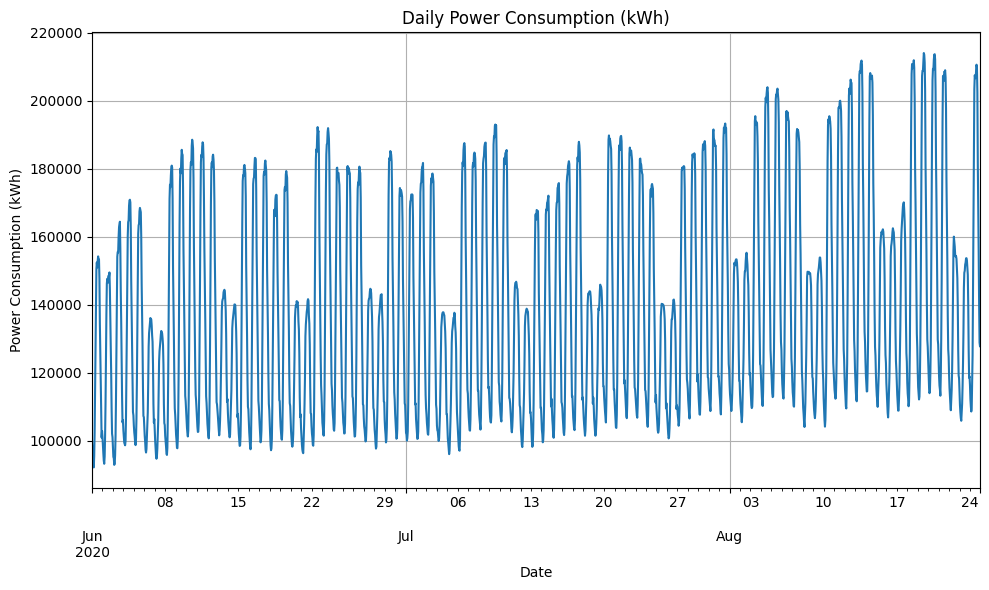

In [ ]:
daily_power_usage = df.groupby('datetime')['전력사용량(kWh)'].sum()

import matplotlib.pyplot as plt
import matplotlib

# 일별 전력 사용량 그래프 생성
plt.figure(figsize=(10,6))
daily_power_usage.plot()
plt.title('Daily Power Consumption (kWh)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

- 시간대별 전력 사용량 확인

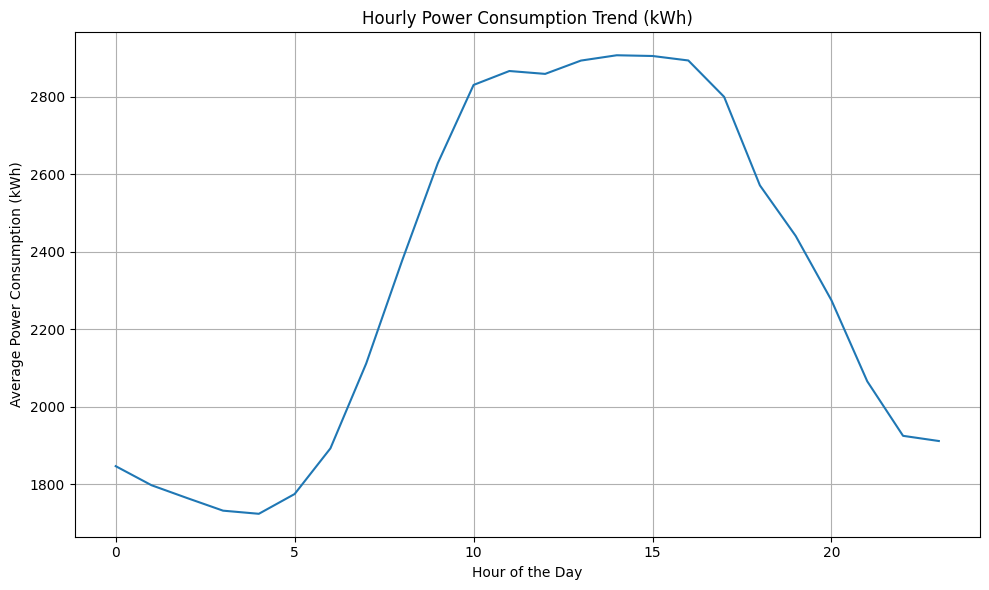

In [ ]:
# 'date_time' 열에서 시간 추출
df['hour'] = df['datetime'].dt.hour

# 시간대별로 그룹화하여 평균 전력 사용량 계산
hourly_power_usage = df.groupby('hour')['전력사용량(kWh)'].mean()

# 시간대별 전력 사용량 그래프 생성
plt.figure(figsize=(10,6))
hourly_power_usage.plot()
plt.title('Hourly Power Consumption Trend (kWh)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption (kWh)')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

- 업무시간대에 전력사용량이 높은것을 확인할 수 있다.

## 요일별 전력 사용량 시각화

<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-18-6afb716e9488>:19: UserWarning: Gl

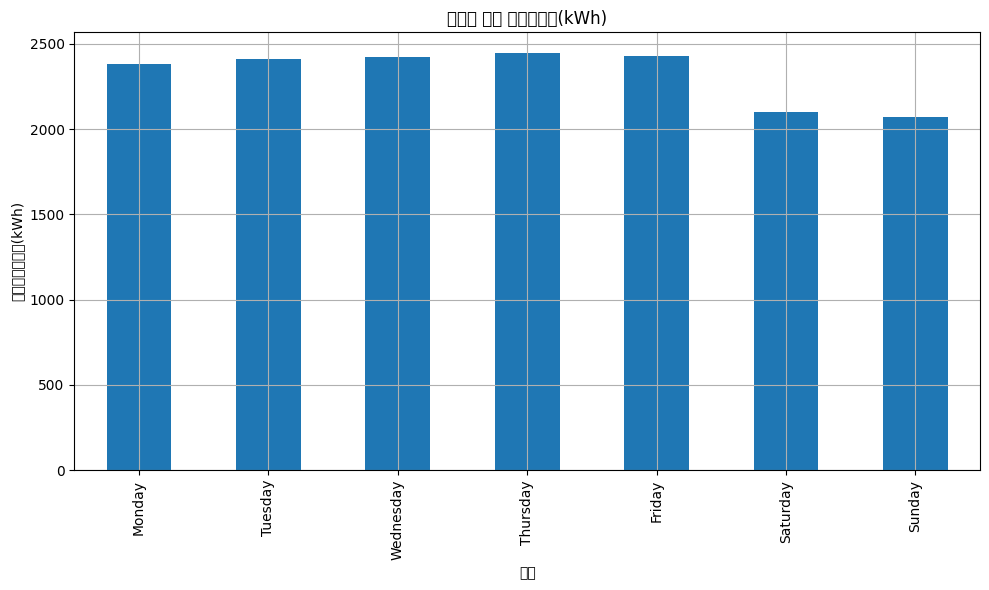

In [ ]:
# 'date_time' 열에서 요일을 추출하여 'day_of_week' 열 생성 (0=월요일, 6=일요일)
df['day_of_week'] = df['datetime'].dt.dayofweek

# 요일 숫자를 실제 요일 이름으로 매핑
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(days)

# 요일별로 그룹화하여 평균 전력 사용량 계산
weekly_power_usage = df.groupby('day_name')['전력사용량(kWh)'].mean()

# 요일 순서대로 재정렬 후 그래프 생성
plt.figure(figsize=(10,6))
weekly_power_usage = weekly_power_usage.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly_power_usage.plot(kind='bar')
plt.title('주간별 평균 전력사용량(kWh)')
plt.xlabel('요일')
plt.ylabel('평균전력사용량(kWh)')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


- 요일별 전력사용량의 차이가 있는지 확인하고 싶었으나, 평일과 주말의 차이가 있음.

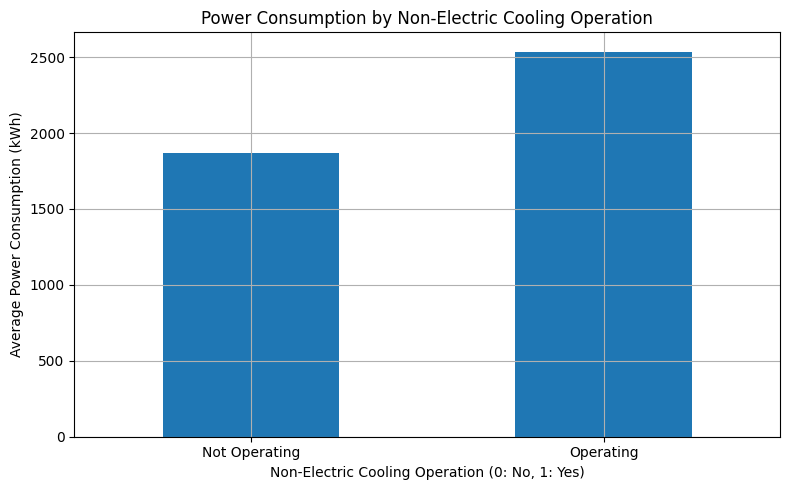

In [ ]:
# '비전기냉방설비운영' 여부에 따른 평균 전력 사용량 계산
non_electric_cooling_usage = df.groupby('비전기냉방설비운영')['전력사용량(kWh)'].mean()

# 비전기 냉방 설비 운영 여부에 따른 전력 사용량 그래프 생성
plt.figure(figsize=(8,5))
non_electric_cooling_usage.plot(kind='bar')
plt.title('Power Consumption by Non-Electric Cooling Operation')
plt.xlabel('Non-Electric Cooling Operation (0: No, 1: Yes)')
plt.ylabel('Average Power Consumption (kWh)')
plt.xticks([0, 1], ['Not Operating', 'Operating'], rotation=0)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


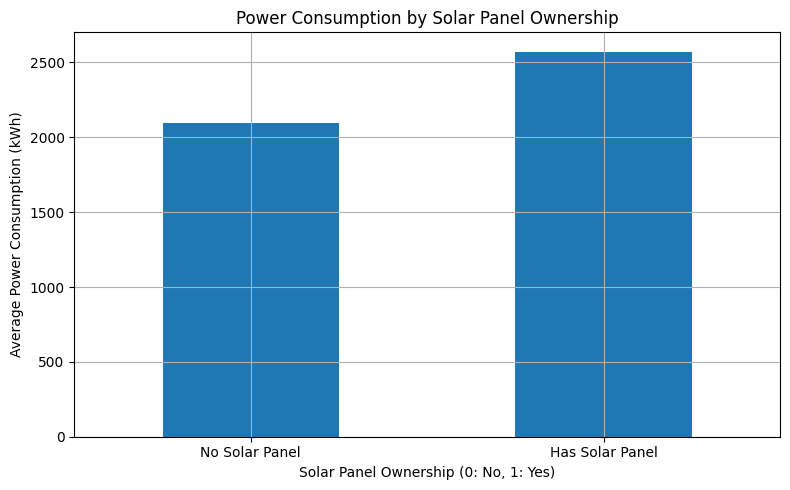

In [ ]:
# '태양광보유' 여부에 따른 평균 전력 사용량 계산
solar_panel_usage = df.groupby('태양광보유')['전력사용량(kWh)'].mean()

# 태양광 보유 여부에 따른 전력 사용량 그래프 생성
plt.figure(figsize=(8,5))
solar_panel_usage.plot(kind='bar')
plt.title('Power Consumption by Solar Panel Ownership')
plt.xlabel('Solar Panel Ownership (0: No, 1: Yes)')
plt.ylabel('Average Power Consumption (kWh)')
plt.xticks([0, 1], ['No Solar Panel', 'Has Solar Panel'], rotation=0)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


<ipython-input-22-21ddf294ea2f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_power_usage = df.groupby('rainfall_bins')['전력사용량(kWh)'].mean()


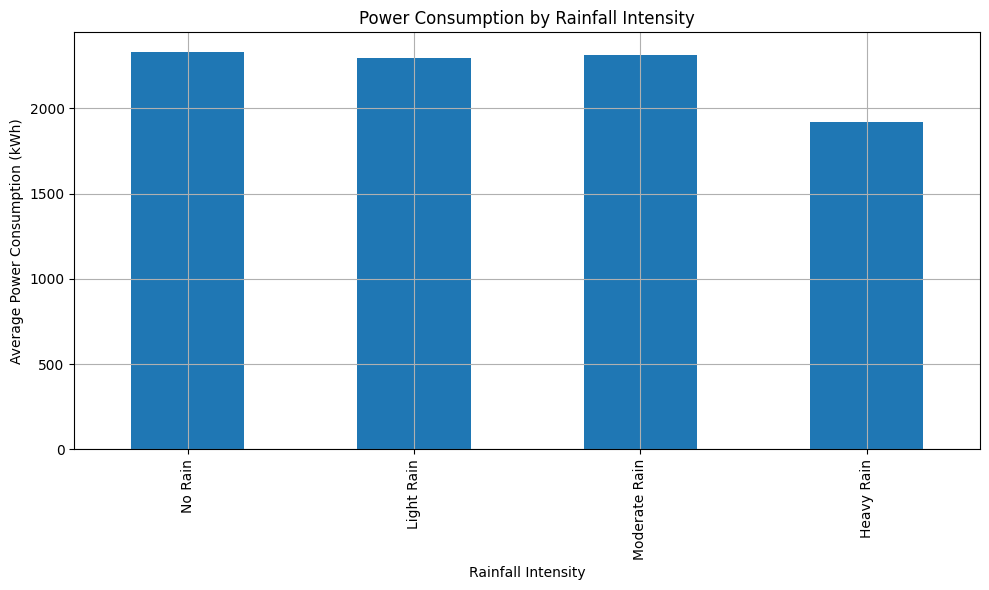

In [ ]:
# 강수량을 기준으로 카테고리화 (비 없음, 가벼운 비, 보통 비, 강한 비, 매우 강한 비)
df['rainfall_bins'] = pd.cut(df['강수량(mm)'], bins=[-0.1, 0, 10, 50, 100], labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

# 강수량 카테고리별로 그룹화하여 평균 전력 사용량 계산
rainfall_power_usage = df.groupby('rainfall_bins')['전력사용량(kWh)'].mean()

# 강수량 카테고리별 전력 사용량 그래프 생성
plt.figure(figsize=(10,6))
rainfall_power_usage.plot(kind='bar')
plt.title('Power Consumption by Rainfall Intensity')
plt.xlabel('Rainfall Intensity')
plt.ylabel('Average Power Consumption (kWh)')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


<ipython-input-23-be5c459aefa9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_power_usage = df.groupby('humidity_bins')['전력사용량(kWh)'].mean()


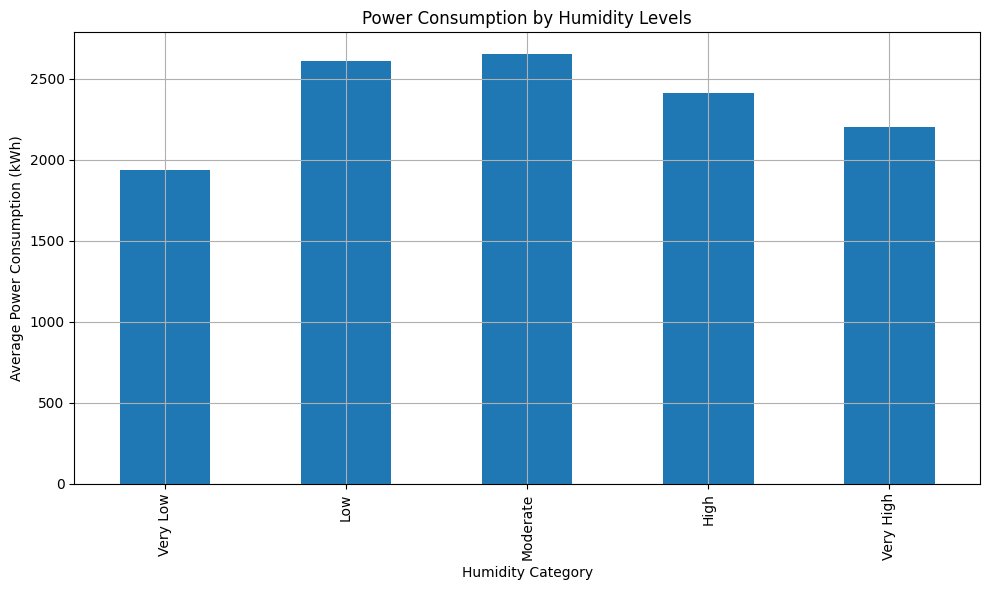

In [ ]:
# 습도를 기준으로 카테고리화 (매우 낮음, 낮음, 보통, 높음, 매우 높음)
df['humidity_bins'] = pd.cut(df['습도(%)'], bins=[-0.1, 20, 40, 60, 80, 100], labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# 습도 카테고리별로 그룹화하여 평균 전력 사용량 계산
humidity_power_usage = df.groupby('humidity_bins')['전력사용량(kWh)'].mean()

# 습도 카테고리별 전력 사용량 그래프 생성
plt.figure(figsize=(10,6))
humidity_power_usage.plot(kind='bar')
plt.title('Power Consumption by Humidity Levels')
plt.xlabel('Humidity Category')
plt.ylabel('Average Power Consumption (kWh)')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
# 'date_time' 열에서 주(week), 일(day), 연도(year) 단위의 컬럼 생성
df['week'] = df['datetime'].dt.isocalendar().week
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year

# 생성된 컬럼 확인
df[['datetime', 'week', 'day', 'year']].head()


,datetime,week,day,year
0,2020-06-01 00:00:00,23,1,2020
1,2020-06-01 01:00:00,23,1,2020
2,2020-06-01 02:00:00,23,1,2020
3,2020-06-01 03:00:00,23,1,2020
4,2020-06-01 04:00:00,23,1,2020


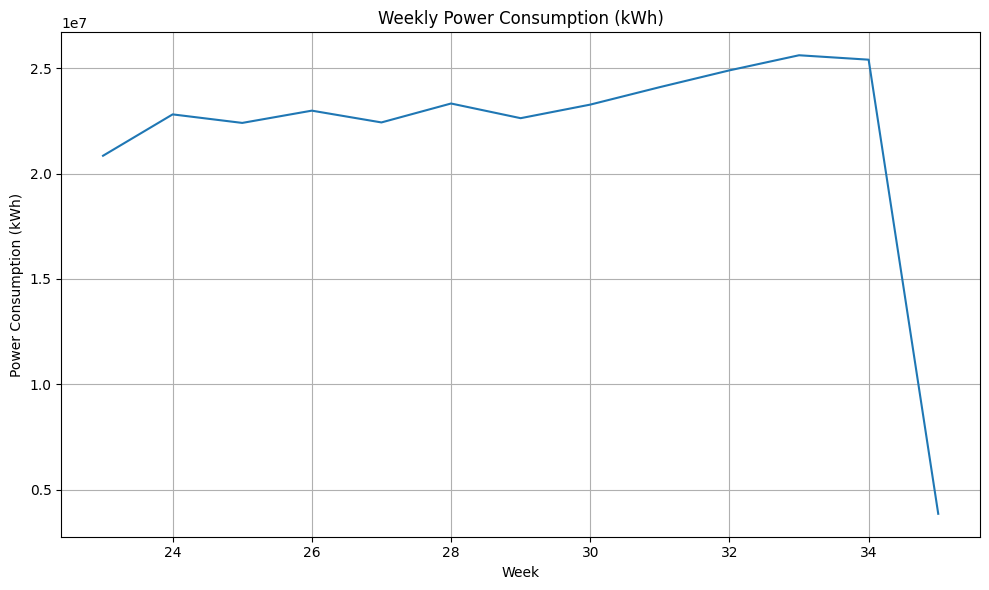

In [ ]:
# 주별로 그룹화하여 전력 사용량 합산
weekly_power_usage = df.groupby('week')['전력사용량(kWh)'].sum()

# 주별 전력 사용량 그래프 생성
plt.figure(figsize=(10,6))
weekly_power_usage.plot()
plt.title('Weekly Power Consumption (kWh)')
plt.xlabel('Week')
plt.ylabel('Power Consumption (kWh)')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


- 모델링

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os
import numpy as np
from sklearn.metrics import mean_squared_error

# 데이터 로드 및 전처리
data = pd.read_csv('train.csv', encoding='cp949')
X = data.drop(columns=['전력사용량(kWh)', 'date_time']).values
y = data['전력사용량(kWh)'].values

# 타겟 변수를 로그 변환 (값의 범위 줄이기)
y = np.log1p(y)  # log(1 + y)로 변환

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 정규화
scaler = RobustScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화

# 데이터를 텐서로 변환
X_tensor = torch.tensor(X_extended, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)
        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, 1)
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# Hyperparameters
learning_rate = 0.0005
weight_decay = 0.01
num_epochs = 20
batch_size = 64

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

# Early Stopping 설정
early_stopping_patience = 5
early_stopping_counter = 0
best_loss = float('inf')

# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
valid_losses = []

for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[train_index], X_tensor[val_index]
    y_train_fold, y_valid_fold = y_tensor[train_index], y_tensor[val_index]

    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = DNNRegression().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

    start_time = time.time()

    early_stopping_counter = 0
    best_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        scheduler.step()

        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)

        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")

        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()

    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
        predictions = model(X_valid_fold)

        # 예측값과 실제값을 원래 스케일로 복원
        predictions = predictions.cpu().numpy()
        predictions_original_scale = np.expm1(predictions)  # 로그 변환된 값을 원래 값으로 변환
        y_valid_original_scale = np.expm1(y_valid_fold.cpu().numpy())  # 실제 y 값도 변환

        # RMSE 계산
        mse = mean_squared_error(y_valid_original_scale, predictions_original_scale)
        rmse = np.sqrt(mse)
        print(f'Fold {fold} - RMSE (Original Scale): {rmse:.4f}')

    valid_losses.append(rmse)
    fold += 1

print(valid_losses)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fold 1, Epoch 1/20, Loss: 12.7822, Valid Loss: 1.7367
Fold 1, Epoch 2/20, Loss: 3.3450, Valid Loss: 1.3000
Fold 1, Epoch 3/20, Loss: 2.2950, Valid Loss: 1.1709
Fold 1, Epoch 4/20, Loss: 1.8465, Valid Loss: 1.1079
Fold 1, Epoch 5/20, Loss: 1.6270, Valid Loss: 0.9894
Fold 1, Epoch 6/20, Loss: 1.4539, Valid Loss: 0.9216
Fold 1, Epoch 7/20, Loss: 1.3080, Valid Loss: 0.8088
Fold 1, Epoch 8/20, Loss: 1.2486, Valid Loss: 0.7241
Fold 1, Epoch 9/20, Loss: 1.1858, Valid Loss: 0.7404
Fold 1, Epoch 10/20, Loss: 1.1386, Valid Loss: 0.6883
Fold 1, Epoch 11/20, Loss: 1.1147, Valid Loss: 0.7003
Fold 1, Epoch 12/20, Loss: 1.0960, Valid Loss: 0.6839
Fold 1, Epoch 13/20, Loss: 1.0711, Valid Loss: 0.6389
Fold 1, Epoch 14/20, Loss: 1.0606, Valid Loss: 0.6110
Fold 1, Epoch 15/20, Loss: 1.0508, Valid Loss: 0.6369
Fold 1, Epoch 16/20, Loss: 1.0446, Valid Loss: 0.6207
Fold 1, Epoch 17/20, Loss: 1.0367, Valid Loss: 0.5990
Fold 1, Epoch 18/20, Loss: 1.0256, Valid Loss: 0.6233
Fold 1, Epoch 19/20, Loss: 1.0346, V

<ipython-input-4-51160f602b6c>:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 1 - RMSE (Original Scale): 2723.7322
Fold 2, Epoch 1/20, Loss: 10.2510, Valid Loss: 1.5152
Fold 2, Epoch 2/20, Loss: 3.0752, Valid Loss: 2.6066
Fold 2, Epoch 3/20, Loss: 2.1650, Valid Loss: 1.5673
Fold 2, Epoch 4/20, Loss: 1.7941, Valid Loss: 1.0990
Fold 2, Epoch 5/20, Loss: 1.5666, Valid Loss: 0.9583
Fold 2, Epoch 6/20, Loss: 1.4061, Valid Loss: 0.6805
Fold 2, Epoch 7/20, Loss: 1.2948, Valid Loss: 0.7419
Fold 2, Epoch 8/20, Loss: 1.2275, Valid Loss: 0.6014
Fold 2, Epoch 9/20, Loss: 1.1616, Valid Loss: 0.5962
Fold 2, Epoch 10/20, Loss: 1.1279, Valid Loss: 0.5708
Fold 2, Epoch 11/20, Loss: 1.0984, Valid Loss: 0.5245
Fold 2, Epoch 12/20, Loss: 1.0653, Valid Loss: 0.5377
Fold 2, Epoch 13/20, Loss: 1.0529, Valid Loss: 0.5337
Fold 2, Epoch 14/20, Loss: 1.0373, Valid Loss: 0.5206
Fold 2, Epoch 15/20, Loss: 1.0269, Valid Loss: 0.5141
Fold 2, Epoch 16/20, Loss: 1.0211, Valid Loss: 0.5012
Fold 2, Epoch 17/20, Loss: 1.0082, Valid Loss: 0.5759
Fold 2, Epoch 18/20, Loss: 1.0088, Valid Loss: 0

<ipython-input-4-51160f602b6c>:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 2 - RMSE (Original Scale): 2088.0894
Fold 3, Epoch 1/20, Loss: 14.1141, Valid Loss: 1.7049
Fold 3, Epoch 2/20, Loss: 3.1379, Valid Loss: 1.3999
Fold 3, Epoch 3/20, Loss: 2.2349, Valid Loss: 1.2345
Fold 3, Epoch 4/20, Loss: 1.9180, Valid Loss: 1.1738
Fold 3, Epoch 5/20, Loss: 1.7101, Valid Loss: 1.0542
Fold 3, Epoch 6/20, Loss: 1.5286, Valid Loss: 0.8185
Fold 3, Epoch 7/20, Loss: 1.4172, Valid Loss: 0.8632
Fold 3, Epoch 8/20, Loss: 1.3401, Valid Loss: 0.8012
Fold 3, Epoch 9/20, Loss: 1.2892, Valid Loss: 0.7912
Fold 3, Epoch 10/20, Loss: 1.2364, Valid Loss: 0.7511
Fold 3, Epoch 11/20, Loss: 1.2138, Valid Loss: 0.7869
Fold 3, Epoch 12/20, Loss: 1.1899, Valid Loss: 0.6988
Fold 3, Epoch 13/20, Loss: 1.1610, Valid Loss: 0.7020
Fold 3, Epoch 14/20, Loss: 1.1421, Valid Loss: 0.6649
Fold 3, Epoch 15/20, Loss: 1.1408, Valid Loss: 0.6756
Fold 3, Epoch 16/20, Loss: 1.1238, Valid Loss: 0.6742
Fold 3, Epoch 17/20, Loss: 1.1167, Valid Loss: 0.6668
Fold 3, Epoch 18/20, Loss: 1.1138, Valid Loss: 0

<ipython-input-4-51160f602b6c>:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 3 - RMSE (Original Scale): 35407.0117
Fold 4, Epoch 1/20, Loss: 10.6950, Valid Loss: 1.5210
Fold 4, Epoch 2/20, Loss: 3.1604, Valid Loss: 1.7094
Fold 4, Epoch 3/20, Loss: 2.1824, Valid Loss: 1.2378
Fold 4, Epoch 4/20, Loss: 1.7643, Valid Loss: 1.0919
Fold 4, Epoch 5/20, Loss: 1.5568, Valid Loss: 0.9725
Fold 4, Epoch 6/20, Loss: 1.4007, Valid Loss: 0.8969
Fold 4, Epoch 7/20, Loss: 1.2957, Valid Loss: 0.7995
Fold 4, Epoch 8/20, Loss: 1.2234, Valid Loss: 0.7397
Fold 4, Epoch 9/20, Loss: 1.1666, Valid Loss: 0.6944
Fold 4, Epoch 10/20, Loss: 1.1157, Valid Loss: 0.7483
Fold 4, Epoch 11/20, Loss: 1.1019, Valid Loss: 0.6567
Fold 4, Epoch 12/20, Loss: 1.0743, Valid Loss: 0.6433
Fold 4, Epoch 13/20, Loss: 1.0649, Valid Loss: 0.6509
Fold 4, Epoch 14/20, Loss: 1.0475, Valid Loss: 0.6318
Fold 4, Epoch 15/20, Loss: 1.0351, Valid Loss: 0.6926
Fold 4, Epoch 16/20, Loss: 1.0224, Valid Loss: 0.6832
Fold 4, Epoch 17/20, Loss: 1.0222, Valid Loss: 0.6320
Fold 4, Epoch 18/20, Loss: 1.0170, Valid Loss: 

<ipython-input-4-51160f602b6c>:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 4 - RMSE (Original Scale): 2795.5767
Fold 5, Epoch 1/20, Loss: 9.5432, Valid Loss: 1.4150
Fold 5, Epoch 2/20, Loss: 3.1401, Valid Loss: 1.6584
Fold 5, Epoch 3/20, Loss: 2.1748, Valid Loss: 0.9030
Fold 5, Epoch 4/20, Loss: 1.7629, Valid Loss: 0.8637
Fold 5, Epoch 5/20, Loss: 1.5633, Valid Loss: 0.7015
Fold 5, Epoch 6/20, Loss: 1.3979, Valid Loss: 0.6132
Fold 5, Epoch 7/20, Loss: 1.2792, Valid Loss: 0.6060
Fold 5, Epoch 8/20, Loss: 1.2154, Valid Loss: 0.5442
Fold 5, Epoch 9/20, Loss: 1.1630, Valid Loss: 0.5416
Fold 5, Epoch 10/20, Loss: 1.1166, Valid Loss: 0.5236
Fold 5, Epoch 11/20, Loss: 1.0887, Valid Loss: 0.5216
Fold 5, Epoch 12/20, Loss: 1.0620, Valid Loss: 0.5217
Fold 5, Epoch 13/20, Loss: 1.0430, Valid Loss: 0.5006
Fold 5, Epoch 14/20, Loss: 1.0292, Valid Loss: 0.4990
Fold 5, Epoch 15/20, Loss: 1.0168, Valid Loss: 0.5134
Fold 5, Epoch 16/20, Loss: 1.0048, Valid Loss: 0.5342
Fold 5, Epoch 17/20, Loss: 0.9975, Valid Loss: 0.5045
Fold 5, Epoch 18/20, Loss: 0.9970, Valid Loss: 0.

<ipython-input-4-51160f602b6c>:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Fold 5 - RMSE (Original Scale): 61456.8320
[2723.7322, 2088.0894, 35407.01, 2795.5767, 61456.832]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['day_name_encoded'] = label_encoder.fit_transform(df['day_name'])

X = df.drop(columns=['전력사용량(kWh)', 'datetime', 'day_name', 'humidity_bins', 'rainfall_bins']).values  # 'date_time' 열을 제거
y = df['전력사용량(kWh)'].values

# KMeans 클러스터링을 통해 파생변수 생성
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values
from sklearn.preprocessing import StandardScaler

# StandardScaler로 데이터 정규화
scaler = StandardScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])  # 클러스터 레이블 제외하고 정규화
X_extended = X_extended.astype(float)

# 드롭아웃 비율을 0.3으로 조정, 활성화 함수 LeakyReLU로 변경
class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.3)
        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.3)
        self.layer3 = nn.Linear(256, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(0.3)
        self.layer4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.3)
        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.3)
        self.output_layer = nn.Linear(64, 1)
        self._initialize_weights()

    def forward(self, x):
        x = torch.nn.LeakyReLU()(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.nn.LeakyReLU()(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.nn.LeakyReLU()(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.nn.LeakyReLU()(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.nn.LeakyReLU()(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64
# K-Fold Cross Validation
kf = KFold(n_splits= 5,  shuffle=True, random_state=42)
fold = 1
# Early Stopping 설정
early_stopping_patience = 5
early_stopping_counter = 0
best_loss = float('inf')
# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)
# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
valid_losses = []
for train_index, val_index in kf.split(X_tensor):
    X_train_fold, X_valid_fold = X_tensor[  train_index   ], X_tensor[   val_index     ]
    y_train_fold, y_valid_fold = y_tensor[  train_index   ], y_tensor[     val_index   ]
    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    model = DNNRegression().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr= 0.001 , weight_decay= 0.1 )
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 2 , gamma = 0.1)
    # 학습 시간 측정 시작
    start_time = time.time()
    # 모델 epoch 다 돌고 조기종료 0으로 초기화.
    early_stopping_counter = 0
    best_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to( device)  # 데이터를 GPU로 이동
            predictions = model(batch_X)
            # 손실 계산
            loss = criterion(predictions, batch_y)
            # 옵티마이저 초기화
            optimizer.zero_grad()
            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        # 학습률 업데이트
        scheduler.step()
        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)
        # log 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")
        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")
        # Early Stopping
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0
            # 성능이 뛰어날때 마다 모델을 저장
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기종료 epoch: {epoch+1}")
                break
    # 모델 불러오기 및 평가
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
        predictions = model(X_valid_fold)
        final_loss = criterion(predictions, y_valid_fold)
        valid_losses.append(criterion(predictions, y_valid_fold))
        print(f"Fold {fold} 평가 손실 Loss: {final_loss.item():.4f}")
        print(f"Fold {fold} 예측 값: {predictions[:5].view(-1).tolist()}")
        print(f"Fold {fold} 실제 값: {y_valid_fold[:5].view(-1).tolist()}")
    fold += 1
# Kfold의 loss 모음
print(valid_losses)

NameError: name 'df' is not defined

###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.